In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import polars as pl

In [ ]:
#%cd /content/drive/MyDrive/Colab Notebooks/Upstage_AI_LAB/ML/ML_Project/data/

#! unzip -qq "parquet_files.zip"

/content/drive/MyDrive/Colab Notebooks/Upstage_AI_LAB/ML/ML_Project/data
replace test/test_applprev_1_0.parquet? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
#feature_def = pl.read_parquet("/content/feature_definitions_dtypes_tables.parquet").to_pandas()
#feature_def.to_csv('feature_def.csv', index=False)

In [ ]:
parquet_f = r"/content/drive/MyDrive/Colab Notebooks/Upstage_AI_LAB/ML/ML_Project/data/"

df_base = pl.read_parquet(parquet_f+"train/train_base.parquet")

In [ ]:
# feature_static0 = pd.merge(
#     pd.DataFrame(zip(df_static_0_0.schema.keys(), df_static_0_0.schema.values()), columns=['Variable', 'dtype']),
#     pd.read_csv(parquet_f + "train/feature_definitions.csv"),
#     on=['Variable'],
#     how='left'
# )

# feature_static0
# #df_static_0_0

# feature_static0.to_csv('static_features.csv', index=False)

In [ ]:
df_base.schema
df_base

case_id,date_decision,MONTH,WEEK_NUM,target
i64,str,i64,i64,i64
0,"""2019-01-03""",201901,0,0
1,"""2019-01-03""",201901,0,0
2,"""2019-01-04""",201901,0,0
3,"""2019-01-03""",201901,0,0
4,"""2019-01-04""",201901,0,1
5,"""2019-01-02""",201901,0,0
6,"""2019-01-03""",201901,0,0
7,"""2019-01-03""",201901,0,0
8,"""2019-01-03""",201901,0,0


# train_credit_bureau_a_1

- null 값이 대부분 > 신용 금융 기관에 기록된 데이터
  - 있고 없고가 target 이 영향을 받는지 안받는지
    - 결측치는 eda로 결정한다(10%가 전부 같으면 엄청 큰 )
    - 있는 것들의 분포
- masking category > null이 없음!
  - null 을 encoding한 값이 들어가있는건 아닌지 확인 필요(어떻게,,?)
  - 모델링 자체에서 tree feature importance가 높은애들, 분포가 특이하게 나오는 애들
  - 그냥 masking에 의미를 부여하지 않는게 중요!
  - 필요하면, 의미가 있다면 찾아보는 게 중요!!!
- 대부분 left skewed 형태
  - log 변환 : np.log1p()
  - 음수 data 존재 컬럼 `dpdmax_757P`: + min 처리

- Feature Engineering:
  - date 처리
  - masking category
  - 부분적으로 포함되어 있는 컬럼
    - 1) linear 모델 선택시 `다중공산성` 이슈 해결 필요
    - 2) 합치거나 빼거나 지지고 볶는 과정은 무조건 필요,, 너무 많아요 데이터ㅠㅠ
  - active vs. closed 분리?

- 코로나 19가 예측에 끼어져있다는게 가장 큰 이슈!
: https://www.kaggle.com/competitions/home-credit-credit-risk-model-stability/discussion/473765


In [ ]:
df_credit_bureau_1_0 = pl.read_parquet(parquet_f+"train/train_credit_bureau_a_1_0.parquet")
df_credit_bureau_1_1 = pl.read_parquet(parquet_f+"train/train_credit_bureau_a_1_1.parquet")
df_credit_bureau_1_2 = pl.read_parquet(parquet_f+"train/train_credit_bureau_a_1_2.parquet")
df_credit_bureau_1_3 = pl.read_parquet(parquet_f+"train/train_credit_bureau_a_1_3.parquet")

In [ ]:
df_credit_bureau_a = pl.concat([df_credit_bureau_1_0, df_credit_bureau_1_1, df_credit_bureau_1_2, df_credit_bureau_1_3])
df_credit_bureau_a = df_credit_bureau_a.to_pandas()

In [ ]:
len(df_credit_bureau_1_0.schema), len(df_credit_bureau_1_1.schema), #len(df_credit_bureau_1_2.schema), len(df_credit_bureau_1_3.schema)

(79, 79)

In [ ]:
#df_credit_bureau_1_0.schema
df_credit_bureau_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4108212 entries, 0 to 4108211
Data columns (total 79 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   case_id                          int64  
 1   annualeffectiverate_199L         float64
 2   annualeffectiverate_63L          float64
 3   classificationofcontr_13M        object 
 4   classificationofcontr_400M       object 
 5   contractst_545M                  object 
 6   contractst_964M                  object 
 7   contractsum_5085717L             float64
 8   credlmt_230A                     float64
 9   credlmt_935A                     float64
 10  dateofcredend_289D               object 
 11  dateofcredend_353D               object 
 12  dateofcredstart_181D             object 
 13  dateofcredstart_739D             object 
 14  dateofrealrepmt_138D             object 
 15  debtoutstand_525A                float64
 16  debtoverdue_47A                  float64
 17  descript

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_credit_bureau_a.isnull().sum())


case_id                                   0
annualeffectiverate_199L           15213904
annualeffectiverate_63L            15629294
classificationofcontr_13M                 0
classificationofcontr_400M                0
contractst_545M                           0
contractst_964M                           0
contractsum_5085717L               15621206
credlmt_230A                       15044115
credlmt_935A                       14685552
dateofcredend_289D                 13281261
dateofcredend_353D                  9188054
dateofcredstart_181D                9188040
dateofcredstart_739D               13281261
dateofrealrepmt_138D                9225946
debtoutstand_525A                  14554700
debtoverdue_47A                    14554700
description_351M                          0
dpdmax_139P                        13296501
dpdmax_757P                         9413642
dpdmaxdatemonth_442T                9413642
dpdmaxdatemonth_89T                13296501
dpdmaxdateyear_596T             

In [ ]:
def print_info(df:pd.DataFrame, col_name):
    temp = '=' * 10 + ' [' + col_name + '] ' + '=' * 10
    print(temp)
    print(f'데이터 타입: {df[col_name].dtype}')
    print(f'NaN값: {any(df[col_name].isna())}, {(df[col_name].isna().sum() / df[col_name].shape[0])}')

    plt.figure(figsize=(6,4))

    if df[col_name].dtype != 'object':
        print(f"(null, 0, positive) = {df[col_name].isna().sum(), (df[col_name] == 0.0).sum(), (df[col_name] > 0.0).sum()}")
        print(f'(min, max): ({df[col_name].dropna().min()}, {df[col_name].dropna().max()})')
        print(f'평균값: {df[col_name].dropna().mean()}')
        print(f'중간값: {df[col_name].dropna().median()}')
        print('=' * len(temp))

        # min 이 음수일 경우
        if df[col_name].dropna().min() < 0:
          temp = df[col_name].dropna() + np.ceil(np.abs(df[col_name]))
          print(df[col_name].dropna().min())
        else:
          temp = df[col_name].dropna()

        # 최댓값이 크면 log 변환, diverse 문제 -> log1p() 사용
        if np.log1p(temp.max()) - np.log1p(temp.min()) > 0.1:
            log_temp = np.log1p(temp)
            sns.kdeplot(log_temp, palette='Blues_r', )
            plt.xlabel('log converted value')
        else:
            sns.kdeplot(df[col_name], palette='Blues_r', )

        plt.title(col_name)
        plt.show()
    else:
				# 날짜 데이터인 경우
        try:
            # 날짜 데이터가 크다면(500개 이상) 연도별 데이터로 변환하기
            if len(df[col_name].value_counts()) > 500:
                df_datetime = pd.DataFrame(pd.to_datetime(df[col_name]).dt.year).value_counts().reset_index()
            else:
                df_datetime = pd.DataFrame(pd.to_datetime(df[col_name])).value_counts().reset_index()

            df_datetime.columns = ['date', 'count']
            df_datetime = df_datetime.set_index('date').sort_index()

            print(f'최솟값: {df_datetime.idxmin().values[0]} | {df_datetime.min().values[0]}')
            print(f'최댓값: {df_datetime.idxmax().values[0]} | {df_datetime.max().values[0]}')

            print('- - ' * 5)
            print('value_counts:')
            print(df[col_name].value_counts())
            print('- - ' * 5)
            print('=' * len(temp))

            sns.barplot(data=df_datetime['count'], palette='Blues', )
            x_ticks_interval = int(len(df_datetime['count']) / 10)
            plt.xticks(range(0, len(df_datetime['count']), x_ticks_interval), rotation=90)
            plt.title(col_name)
            plt.show()

        # 날짜 데이터로 변환이 불가능한 경우
        except:
            print(f'(min, max): ({df[col_name].dropna().min()}, {df[col_name].dropna().max()})')

            print('- - ' * 5)
            print('value_counts:')
            print(df[col_name].value_counts())
            print('- - ' * 5)
            print('=' * len(temp))

						# 카테고리가 10개를 넘는다면 5개만을 뽑아서 시각화
            if len(df[col_name].value_counts()) > 10:
                slice = 5
            else:
                slice = len(df[col_name])

            sns.countplot(data=df, x=col_name, order=df[col_name].value_counts()[:slice].index, palette='Blues_r', )
            plt.xticks(rotation=90, ha='right')
            plt.title(col_name)
            plt.show()

## annualeffectiverate_199L

- Closed contract의 유효이자율(복리)
  - 채권 또는 채무의 이자를 인식할 때, 그 이자율이 매년 일정하게 되도록 하는 이자수익/비용 계산방법
  - 참고해보셔도 좋을 것 같습니다!(https://www.investopedia.com/terms/e/effectiveinterest.asp)

> **해석**
- 99% 이상이 null값 -> 4108211중 36981
- max가 73000.000000 --> 유효이자율이 이렇게 크게 나올 수가 있나? 63개의 rows
- 0과 null 값의 차이? 0 유의미하다 판단 -> 0 포함 mean, medain 계산


> **필요 논의**
- nominal rate 컬럼과 비교 필요성(nominalrate_281L, nominalrate_498L)
- classificationofcontr_400M(closed contract에 대한 classification) 별로 분류, 특징 추출




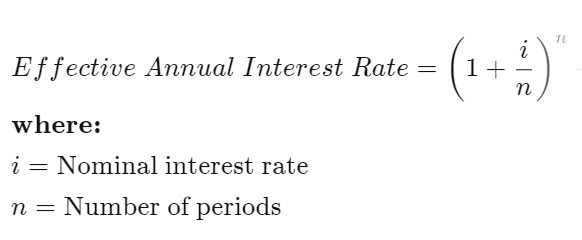

========== [annualeffectiverate_199L] ==========
데이터 타입: float64
NaN값: True, 0.9544160275152588
(null, 0, positive) = (15213904, 24417, 702216)
(min, max): (0.0, 91250.0)
평균값: 1069.1376995539704
중간값: 38.3


<ipython-input-26-7480a55719a5>:25: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(log_temp, palette='Blues_r', )


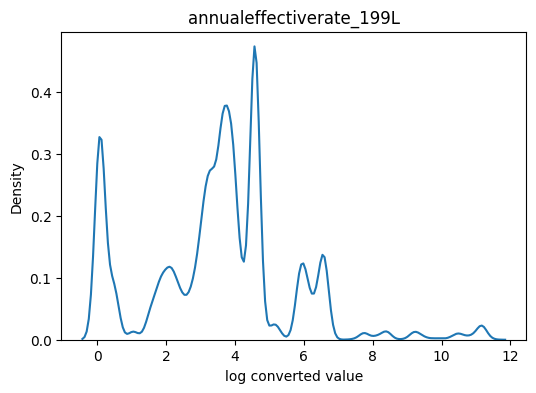

In [ ]:
print_info(df_credit_bureau_a,'annualeffectiverate_199L')

In [ ]:
df_credit_bureau_a.annualeffectiverate_199L.describe()

count    726633.000000
mean       1069.137700
std        7355.213474
min           0.000000
25%           9.130000
50%          38.300000
75%          96.300000
max       91250.000000
Name: annualeffectiverate_199L, dtype: float64

In [ ]:
df_credit_bureau_a[df_credit_bureau_a.annualeffectiverate_199L == 73000.000000]

,case_id,annualeffectiverate_199L,annualeffectiverate_63L,classificationofcontr_13M,classificationofcontr_400M,contractst_545M,contractst_964M,contractsum_5085717L,credlmt_230A,credlmt_935A,...,residualamount_488A,residualamount_856A,subjectrole_182M,subjectrole_93M,totalamount_6A,totalamount_996A,totaldebtoverduevalue_178A,totaldebtoverduevalue_718A,totaloutstanddebtvalue_39A,totaloutstanddebtvalue_668A
55698,7654,73000.0,NaN,a55475b1,00135d9c,a55475b1,7241344e,NaN,NaN,NaN,...,NaN,NaN,a55475b1,a55475b1,4000.0,NaN,NaN,NaN,NaN,NaN
131791,17491,73000.0,NaN,a55475b1,00135d9c,a55475b1,7241344e,NaN,NaN,NaN,...,NaN,NaN,a55475b1,a55475b1,10000.0,NaN,NaN,NaN,NaN,NaN
149124,19487,73000.0,NaN,a55475b1,00135d9c,a55475b1,7241344e,NaN,NaN,NaN,...,NaN,NaN,a55475b1,a55475b1,8000.0,NaN,NaN,NaN,NaN,NaN
516994,133025,73000.0,NaN,a55475b1,00135d9c,a55475b1,7241344e,NaN,NaN,NaN,...,NaN,NaN,a55475b1,a55475b1,8000.0,NaN,NaN,NaN,NaN,NaN
518069,133108,73000.0,NaN,a55475b1,00135d9c,a55475b1,7241344e,NaN,NaN,NaN,...,NaN,NaN,a55475b1,a55475b1,10000.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15905234,2700393,73000.0,NaN,a55475b1,00135d9c,a55475b1,1603bd2c,NaN,NaN,NaN,...,NaN,NaN,a55475b1,a55475b1,10000.0,NaN,NaN,NaN,NaN,NaN
15905955,2700448,73000.0,NaN,a55475b1,00135d9c,a55475b1,24706fdc,NaN,NaN,NaN,...,NaN,NaN,a55475b1,a55475b1,20000.0,NaN,NaN,NaN,NaN,NaN
15915980,2701295,73000.0,NaN,a55475b1,00135d9c,a55475b1,7241344e,NaN,NaN,NaN,...,NaN,NaN,a55475b1,a55475b1,14000.0,NaN,NaN,NaN,NaN,NaN
15926060,2702186,73000.0,NaN,a55475b1,00135d9c,a55475b1,7241344e,NaN,NaN,NaN,...,NaN,NaN,a55475b1,a55475b1,14000.0,NaN,NaN,NaN,NaN,NaN


## annualeffectiverate_63L

- Active contract의 유효 이자율(복리)

> **해석**
- 98% 이상이 null값
- max는 closed contract와 동일
- 0과 null 값의 차이? 0 유의미하다 판단 -> 0 포함 mean, medain 계산


> **필요 논의**
- nominal rate 컬럼과 비교 필요성(nominalrate_281L, nominalrate_498L)
- classificationofcontr_400M(closed contract에 대한 classification) 별로 분류, 특징 추출
- closed contract와 active contract rate의 값이 동시에 있는 경우는 어떻게 해석?

========== [annualeffectiverate_63L] ==========
데이터 타입: float64
NaN값: True, 0.9804747481217226
(null, 0, positive) = (15629294, 7960, 303283)
(min, max): (0.0, 91250.0)
평균값: 155.65459078597752
중간값: 22.85


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-17-0da34c2d718b>:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(temp, palette='Blues_r', )


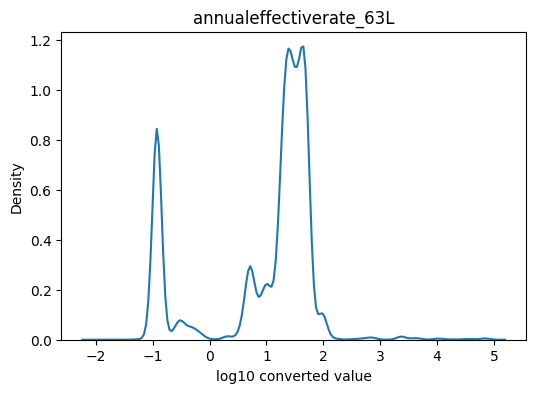

In [ ]:
print_info(df_credit_bureau_a,'annualeffectiverate_63L')

In [ ]:
df_credit_bureau_a.annualeffectiverate_63L.describe()

count    311243.000000
mean        155.654591
std        2551.590803
min           0.000000
25%           5.100000
50%          22.850000
75%          38.820000
max       91250.000000
Name: annualeffectiverate_63L, dtype: float64

       index  annualeffectiverate_199L
0      96.30                      3855
1     730.00                      2007
2      98.55                      1987
3       0.12                      1711
4     365.00                      1528
...      ...                       ...
3086    4.71                         1
3087   35.37                         1
3088   28.76                         1
3089  108.41                         1
3090   40.12                         1

[3091 rows x 2 columns]
       index  annualeffectiverate_63L
0       0.12                    11984
1       0.11                     2010
2       0.00                     1976
3      96.30                     1562
4       5.11                     1201
...      ...                      ...
4300  447.70                        1
4301   55.00                        1
4302   49.45                        1
4303   25.81                        1
4304   46.48                        1

[4305 rows x 2 columns]


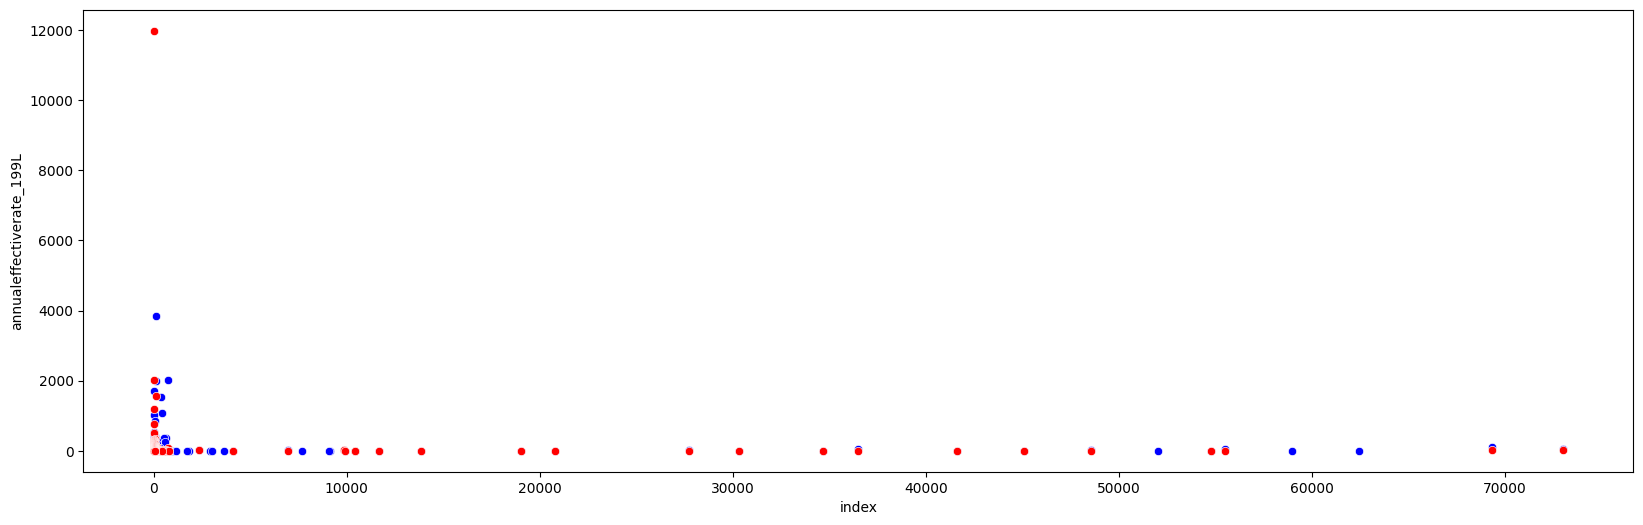

In [ ]:
closed_effective_rate = df_credit_bureau_1_0.annualeffectiverate_199L.value_counts().reset_index() # 36980
active_effective_rate = df_credit_bureau_1_0.annualeffectiverate_63L.value_counts().reset_index()
print(closed_effective_rate)
print(active_effective_rate)

closed_effective_rate_filtered = closed_effective_rate[closed_effective_rate['index'] > 0]
active_effective_rate_filtered = active_effective_rate[active_effective_rate['index'] > 0]

plt.figure(figsize=(20, 6))
sns.scatterplot(data=closed_effective_rate_filtered, x='index', y='annualeffectiverate_199L', color='blue')
sns.scatterplot(data=active_effective_rate_filtered, x='index', y='annualeffectiverate_63L', color='red')
plt.show()

## nominalrate_281L

- Active contract의 명목 금리

> **해석**
- 0일 때
  - 금리가 0%인 대출: 대출이 무이자 대출이거나, 이자를 포함한 기본금액만 상환해야 하는 경우
  - 정책적인 이유: 대출 상품이나 금융 제도에 따라 명목금리가 0으로 설정되는 경우가 있을 수 있음. 예를 들어, 정부에서 지원하는 특정 대출 프로그램이나 혜택을 받는 경우에는 명목금리가 0으로 설정될 수 있음.


> **필요 논의**
- 유효 이자율 컬럼과 closed, active 동시에 값이 있는 경우 -> contract classification으로 분류시도

In [ ]:
x = df_credit_bureau_1_0.nominalrate_281L
print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"(min, max) = {x.min()}, {x.max()}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"(null, 0, >0) = {x.isna().sum(), (x == 0.0).sum(), (x > 0.0).sum()}")
# print(f"평균: {x[x > 0].mean()}")
# print(f"중간값(0이상): {x[x > 0].median()}")
print(f"평균: {x.mean()}")
print(f"중간값: {x.median()}")

========== [nominalrate_281L] ==========
데이터 타입: float64
NaN값: True, 0.9385493098507284
(null, 0, positive) = (14960980, 120265, 859292)
(min, max): (0.0, 59140.9)
평균값: 41.782558483069394
중간값: 39.0


<ipython-input-11-f9e49d76f13e>:29: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(log_temp, palette='Blues_r', )
<ipython-input-11-f9e49d76f13e>:30: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(log_temp2, palette='Blues_r', )


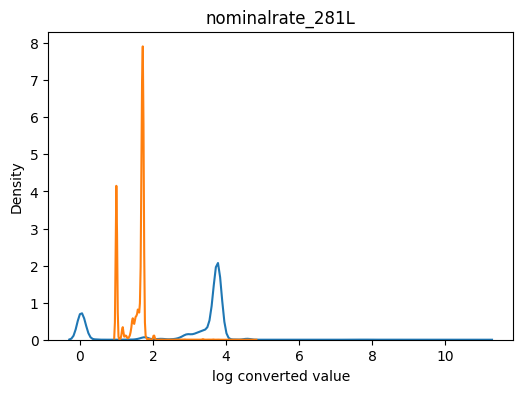

In [ ]:
print_info(df_credit_bureau_a, 'nominalrate_281L')

In [ ]:
np.expm1(3.7)

39.4473043600674

## nominalrate_498L

- Closed contract의 명목 금리

In [ ]:
x = df_credit_bureau_1_0.nominalrate_498L
print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"(min, max) = {x.min()}, {x.max()}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"(null, 0, >0) = {x.isna().sum(), (x == 0.0).sum(), (x > 0.0).sum()}")
# print(f"평균: {x[x > 0].mean()}")
# print(f"중간값(0이상): {x[x > 0].median()}")
print(f"평균: {x.mean()}")
print(f"중간값: {x.median()}")

컬럼명: nominalrate_498L
데이터 타입: float64
(min, max) = 0.0, 30341.1
NA 값: True, 0.9663094310
(null, 0, >0) = (3969804, 3389, 135019)
평균: 65.41531197618633
중간값: 43.3


========== [nominalrate_498L] ==========
데이터 타입: float64
NaN값: True, 0.8551098372658337
(null, 0, positive) = (13630910, 102639, 2206988)
(min, max): (0.0, 59140.9)
평균값: 105.40289306022137
중간값: 43.0


<ipython-input-11-f9e49d76f13e>:29: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(log_temp, palette='Blues_r', )
<ipython-input-11-f9e49d76f13e>:30: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(log_temp2, palette='Blues_r', )


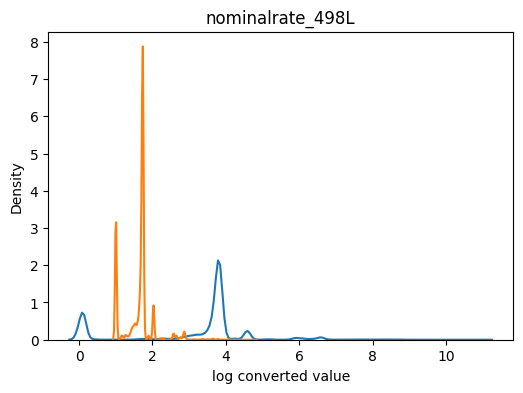

In [ ]:
print_info(df_credit_bureau_a, 'nominalrate_498L')

In [ ]:
selected_columns_df= df_credit_bureau_1_0[['annualeffectiverate_63L','nominalrate_281L']][df_credit_bureau_1_0.annualeffectiverate_199L == 96.30].notnull().sum()
selected_columns_df

annualeffectiverate_63L    33
nominalrate_281L           63
dtype: int64

In [ ]:
df_credit_bureau_1_0[['annualeffectiverate_63L','nominalrate_281L']][df_credit_bureau_1_0.index == 311649	]

,annualeffectiverate_63L,nominalrate_281L
311649,96.3,96.3


In [ ]:
df_credit_bureau_1_0[['annualeffectiverate_63L','nominalrate_281L']][df_credit_bureau_1_0.index == 578908	]

,annualeffectiverate_63L,nominalrate_281L
578908,NaN,45.0


## contractsum_5085717L
- Sum of other contract values.
- 해당 계약 외의 계약 가치 합계

> **해석**
- 해당 sampling file에서는 모든 컬럼이 NaN값

In [ ]:
x = df_credit_bureau_1_0.contractsum_5085717L
print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"(min, max) = {x.min()}, {x.max()}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"(null, 0, >0) = {x.isna().sum(), (x == 0.0).sum(), (x > 0.0).sum()}")

컬럼명: contractsum_5085717L
데이터 타입: float64
(min, max) = nan, nan
NA 값: True, 1.0000000000
(null, 0, >0) = (4108212, 0, 0)
평균: nan
중간값: nan


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


# ------ Masking Categorical Columns --------

## classificationofcontr_13M
- Active contract 에 대한 분류
- Masking categories

> **필요 논의**
- 관련기관의 내부 코드에 대한 설명 없는 것 같음(저는 못찾았습니다,,)
- 인코딩된 값들을 값별로 분류하여 EDA 진행필요

In [ ]:
x = df_credit_bureau_1_0.classificationofcontr_13M
print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"Categories: {len(x.unique())},{ x.unique()}")
print("--- Value Counts ---")
x.value_counts()

컬럼명: classificationofcontr_13M
데이터 타입: object
NA 값: False, 0.0000000000
Categories: 11,['4408ff0f' 'ea6782cc' 'a55475b1' '01f63ac8' '00135d9c' 'be7b251d'
 '1cf4e481' '2c070815' '0d95a828' '87bdbcba' '4a5a01e3']
--- Value Counts ---


a55475b1    3450380
ea6782cc     573453
01f63ac8      50212
00135d9c      23276
4408ff0f       9503
1cf4e481        724
be7b251d        461
87bdbcba         89
2c070815         68
4a5a01e3         40
0d95a828          6
Name: classificationofcontr_13M, dtype: int64

## classificationofcontr_400M
- Closed contract 에 대한 분류
- Masking categories

> **해석**
- active 대비 269개의 분류코드로 개수가 더 많음

> **필요 논의**
- 인코딩된 값들을 값별로 분류하여 EDA 진행필요

In [ ]:
x = df_credit_bureau_1_0.classificationofcontr_400M
print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"Categories: {len(x.unique())},{ x.unique()}")
print("--- Value Counts ---")
x.value_counts()

컬럼명: classificationofcontr_400M
데이터 타입: object
NA 값: False, 0.0000000000
Categories: 269,['a55475b1' '42a42e75' '9158339f' 'ea6782cc' 'ec922b98' '00135d9c'
 '01f63ac8' '4d2b9cd0' 'e6e56e83' 'e2453741' '601cfe5f' 'abc5878e'
 'ca07e0d6' 'f920c170' '62332675' '82965c7a' 'dd6cd7aa' '4408ff0f'
 '774911f7' 'd7416962' '6bb2b70e' '49855383' '4538d522' '29e648ae'
 '55eb9d11' '4d2436d9' 'be7b251d' '77c7bdfb' '4bfb5a21' '027d4b28'
 '63fce35a' '2e5e2bb9' '5f293b85' '1cf4e481' '8908ccad' '1c2f906f'
 '87bdbcba' '79b97402' '5b8517e9' '6ae7d0e3' '5ad7b811' 'e2c05ae3'
 'dbf17744' '9b63302f' '826d5b48' 'fa2a66b3' '230dc470' '8263790e'
 '4a5a01e3' '8f87c488' 'a4b6a70e' '1e4f28a8' '0ed3eee1' '647099a6'
 '081682a1' '61cc60d3' '34a4286a' '0493ea83' 'db56c4a9' '062b8e29'
 'edc37208' '98dfefeb' '0f47bdf2' '1cb1f521' 'd9c7cde9' '436d55c2'
 'bfd4245f' '2c070815' '995ac35a' '8cdad5d5' 'ada1729d' '9cfa69de'
 '76a58e34' '7f2f3d6e' '011769b0' '4a1b5795' '51590aa9' '091852df'
 '6c1df6a3' '8b7ee014' '07df5b96' '3afcf

a55475b1    3652298
ea6782cc     278136
01f63ac8      58625
00135d9c      22106
42a42e75      13884
             ...   
515f46cb          1
49f07a42          1
2894c516          1
ffee884a          1
cb32ffbb          1
Name: classificationofcontr_400M, Length: 269, dtype: int64

In [ ]:
condition = df_credit_bureau_1_0.classificationofcontr_13M != df_credit_bureau_1_0.classificationofcontr_400M
df_credit_bureau_1_0.loc[condition, :]

,case_id,annualeffectiverate_199L,annualeffectiverate_63L,classificationofcontr_13M,classificationofcontr_400M,contractst_545M,contractst_964M,contractsum_5085717L,credlmt_230A,credlmt_935A,...,residualamount_488A,residualamount_856A,subjectrole_182M,subjectrole_93M,totalamount_6A,totalamount_996A,totaldebtoverduevalue_178A,totaldebtoverduevalue_718A,totaloutstanddebtvalue_39A,totaloutstanddebtvalue_668A
0,388,NaN,NaN,4408ff0f,a55475b1,7241344e,a55475b1,NaN,NaN,NaN,...,NaN,NaN,ab3c25cf,ab3c25cf,NaN,268897.62,0.0,0.0,374419.500,0.0
1,388,NaN,NaN,ea6782cc,a55475b1,7241344e,a55475b1,NaN,NaN,135806.0,...,NaN,114325.805,a55475b1,a55475b1,NaN,NaN,NaN,NaN,NaN,NaN
11,405,NaN,NaN,ea6782cc,a55475b1,7241344e,a55475b1,NaN,NaN,0.0,...,NaN,0.000,ab3c25cf,a55475b1,NaN,NaN,0.0,NaN,224467.500,NaN
12,405,NaN,NaN,4408ff0f,a55475b1,7241344e,a55475b1,NaN,NaN,NaN,...,NaN,NaN,a55475b1,a55475b1,NaN,256000.00,NaN,NaN,NaN,NaN
22,409,NaN,NaN,ea6782cc,a55475b1,7241344e,a55475b1,NaN,NaN,NaN,...,NaN,NaN,ab3c25cf,ab3c25cf,NaN,150000.00,0.0,0.0,52079.754,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4108195,2588480,NaN,NaN,a55475b1,00135d9c,a55475b1,7241344e,NaN,NaN,NaN,...,NaN,NaN,a55475b1,a55475b1,10000.0,NaN,NaN,NaN,NaN,NaN
4108196,2588480,NaN,NaN,a55475b1,00135d9c,a55475b1,7241344e,NaN,NaN,NaN,...,NaN,NaN,a55475b1,a55475b1,32000.0,NaN,NaN,NaN,NaN,NaN
4108197,2588480,NaN,NaN,a55475b1,00135d9c,a55475b1,7241344e,NaN,NaN,NaN,...,NaN,NaN,a55475b1,a55475b1,60000.0,NaN,NaN,NaN,NaN,NaN
4108198,2588480,NaN,NaN,a55475b1,00135d9c,a55475b1,7241344e,NaN,NaN,NaN,...,NaN,NaN,a55475b1,a55475b1,30000.0,NaN,NaN,NaN,NaN,NaN


## contractst_545M
- 계약 상태(contract status)
- Masking categories

> **해석**
- 개념상으로만 보면 active contract

>**필요논의**
- null x -> 비활성(관련 없음)과 같은 의미를 나타내는 코드를 사용할 것으로 추정(a55475b1 이거지 않을까,,)
- 상태 역시 카테고리별로 나눠 eda 진행해볼 필요성 존재

In [ ]:
x = df_credit_bureau_1_0.contractst_545M
print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"Categories: {len(x.unique())},{ x.unique()}")
print("--- Value Counts ---")
x.value_counts()

컬럼명: contractst_545M
데이터 타입: object
NA 값: False, 0.0000000000
Categories: 43,['7241344e' 'a55475b1' '0dc85f9d' '8f3a197f' 'a52d5641' 'b919198c'
 '3d18d6ef' '885ce291' '7640edc3' 'e2e7d341' 'dd67cff0' '90d9e529'
 'fd624e63' '83931972' '6d2380c9' '9dea9bea' '25c364c5' '432a781c'
 '54132f86' '53033298' '6974b37f' '38b74d51' 'be389466' 'f7394eb0'
 'ba680094' 'ec24545f' '5733d57a' '823dcc3b' '82a92878' '68256a83'
 '29503771' 'd692b98e' '98492412' 'd7162397' '4462144e' '8456b067'
 '8889b41c' 'dcde6a37' '5c1a3a82' '5f78510b' 'ba1f9cb6' 'df63fbf8'
 '02699f0c']
--- Value Counts ---


a55475b1    3451448
7241344e     635548
8f3a197f       6330
0dc85f9d       5667
dd67cff0       1935
a52d5641       1690
b919198c       1652
885ce291        970
7640edc3        541
83931972        458
90d9e529        332
fd624e63        309
e2e7d341        293
9dea9bea        140
ba680094        110
3d18d6ef        107
82a92878         99
38b74d51         92
823dcc3b         81
6974b37f         62
25c364c5         56
f7394eb0         52
53033298         49
54132f86         46
ec24545f         40
5733d57a         33
6d2380c9         16
be389466         10
d692b98e         10
432a781c          8
29503771          7
d7162397          6
4462144e          2
5f78510b          2
df63fbf8          2
02699f0c          2
68256a83          1
98492412          1
8456b067          1
8889b41c          1
dcde6a37          1
5c1a3a82          1
ba1f9cb6          1
Name: contractst_545M, dtype: int64

In [ ]:
df_credit_bureau_1_0[df_credit_bureau_1_0.contractst_545M == '29503771'][['annualeffectiverate_199L', 'annualeffectiverate_63L']]

,annualeffectiverate_199L,annualeffectiverate_63L
1044754,NaN,43.90
1044755,NaN,52.56
1044756,NaN,53.56
1044757,NaN,38.98
1044758,NaN,33.88
1044759,NaN,38.21
1045424,NaN,18.29


In [ ]:
df_credit_bureau_1_0[df_credit_bureau_1_0.contractst_545M == '5f78510b'][['annualeffectiverate_199L', 'annualeffectiverate_63L']]

,annualeffectiverate_199L,annualeffectiverate_63L
2835002,NaN,NaN
2835003,NaN,NaN


## contractst_964M
- Contract status of terminated credit contract.
- 종료된 신용 계약 상태
- Masking categories

> **해석**
- 개념상 closed contract에 한정

> **필요논의**
- null x -> 비활성(관련 없음)과 같은 의미를 나타내는 코드를 사용할 것으로 추정(a55475b1 이거지 않을까,,)
- 상태 역시 카테고리별로 나눠 eda 진행해볼 필요성 존재


In [ ]:
x = df_credit_bureau_1_0.contractst_964M
print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"Categories: {len(x.unique())},{ x.unique()}")
print("--- Value Counts ---")
x.value_counts()

컬럼명: contractst_964M
데이터 타입: object
NA 값: False, 0.0000000000
Categories: 156,['a55475b1' '7241344e' '4476359f' '9c5b185b' '88c858bd' 'b83056f9'
 '8f3a197f' 'fec76166' 'ec24545f' 'd7416962' '99b37d4f' 'dc23998c'
 '45c45f3e' 'fc4d11b5' '3dc5f434' 'a3386307' '70affaa7' '89721976'
 '823dcc3b' '6fec7e5a' 'b3d257d6' '0e5ef3a9' '8af2607b' '41694615'
 'fb5bb537' '06d8f033' '7640edc3' '4aa8e9a9' '0dc85f9d' 'f42e087b'
 'fd624e63' '866fd1ca' 'f7149e7d' 'a1eaca09' 'c288ac5d' '40f2a89d'
 'b919198c' 'a72cf06d' 'e57b442b' 'b2f1bf5c' 'ac175213' '9dd1e8a8'
 'aa0592d0' '06bb8bb0' '20de729b' '70e97c43' 'ba680094' '6c4189f0'
 '8260bab9' '0bc37630' 'a13b3828' '04bf6e27' '8ff23ce1' 'a52d5641'
 '7dae3286' '9dea9bea' '0976db55' '89c856d6' 'cae5106c' 'd25ebcc6'
 '1ba77602' '885ce291' 'c9a96633' '25c364c5' '6d2380c9' '3d18d6ef'
 'f1e73b19' '4462144e' '53033298' 'a04ef3dc' 'f7394eb0' 'b6c22a8c'
 '90d9e529' '1f494995' 'be9e15dc' 'ed8c6655' 'ef4b2e3c' '7be8d958'
 'd7162397' 'c0187f17' '02699f0c' '98d87078' '8456b

a55475b1    3651620
7241344e     424070
8f3a197f       8369
a3386307       4866
8260bab9       3278
             ...   
ed83b8b7          1
fb5bb537          1
dd67cff0          1
80fac3c6          1
12d3446b          1
Name: contractst_964M, Length: 156, dtype: int64

## -------- 여기서 부턴 credit contract 도 포함 -----------

## credlmt_230A
- credit bureau에서의 종료된 `신용` 계약의 신용 한도 금액

> **해석**
- 신용한도가 높을수록, 고객의 신용도(신용력)이 높을 가능성

In [ ]:
x = df_credit_bureau_1_0.credlmt_230A
print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"(min, max) = {x.min()}, {x.max()}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"(null, 0, >0) = {x.isna().sum(), (x == 0.0).sum(), (x > 0.0).sum()}")
# print(f"평균: {x[x > 0].mean()}")
# print(f"중간값(0이상): {x[x > 0].median()}")
print(f"평균: {x.mean()}")
print(f"중간값: {x.median()}")

컬럼명: credlmt_230A
데이터 타입: float64
(min, max) = 0.0, 100000000.0
NA 값: True, 0.9843498826
(null, 0, >0) = (4043918, 23584, 40710)
평균: 35626.14771547791
중간값: 12785.9


## credlmt_935A
- 현재 고객이 가지고 있는 진행 중인 대출 신용 한도 금액



In [ ]:
x = df_credit_bureau_1_0.credlmt_935A
print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"(min, max) = {x.min()}, {x.max()}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"(null, 0, >0) = {x.isna().sum(), (x == 0.0).sum(), (x > 0.0).sum()}")
# print(f"평균: {x[x > 0].mean()}")
# print(f"중간값(0이상): {x[x > 0].median()}")
print(f"평균: {x.mean()}")
print(f"중간값: {x.median()}")

컬럼명: credlmt_935A
데이터 타입: float64
(min, max) = 0.0, 1848000100.0
NA 값: True, 0.9274494598
(null, 0, >0) = (3810159, 93496, 204557)
평균: 99771.4078400808
중간값: 20000.0


## description_351M
- Categorization of clients by credit bureau.
- 신용 평가 기관에 의한 고객 분류

> **필요논의**
- 고객분류에도 a55475b1 해당 항목 가장 많음 --> null 값의 인코딩된 값일 가능성

In [ ]:
x = df_credit_bureau_1_0.description_351M
print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"Categories: {len(x.unique())},{ x.unique()}")
print("--- Value Counts ---")
x.value_counts()

컬럼명: description_351M
데이터 타입: object
NA 값: False, 0.0000000000
Categories: 12,['a55475b1' 'f8e51f8d' '53179c19' '8a7423d5' '18e98e64' '1d89fa48'
 '95decc86' '6da7c7ed' '0349102c' '0cb4d552' '0bfbf8f5' '153cfa61']
--- Value Counts ---


a55475b1    4090814
6da7c7ed       4102
95decc86       2545
f8e51f8d       2068
0349102c       2039
53179c19       1982
1d89fa48       1587
18e98e64       1553
8a7423d5        781
0cb4d552        517
0bfbf8f5        214
153cfa61         10
Name: description_351M, dtype: int64

## --------- 날짜 계산 필요 가능성 컬럼들 -------------

- date dtype로 데이터 파이프로 일괄변환 필요성(pandas, df로 eda 진행할 경우)
- base file의 date_decision과 날짜 일수로 계산?

## dateofcredend_289D
- End date of an active credit contract.
- active 신용 계약의 종료 날짜
- date로 변환

In [ ]:
x = df_credit_bureau_1_0.dateofcredend_289D
x_dt = pd.to_datetime(x)
print(f"데이터 타입은? {x_dt.dtype}")
print(f"(min, max) = {x_dt.min().date()}, {x_dt.max().date()}")
print(f"NA 값이 있나요? {any(x.isna())}, {x.isna().sum()/len(x) * 100}")
print(f"dayofweek 종류: \n{x_dt.dt.dayofweek.value_counts().sort_values(ascending=False)}")

데이터 타입은? datetime64[ns]
(min, max) = 2004-05-29, 2098-01-15
NA 값이 있나요? True, 83.97363621935772
dayofweek 종류: 
0.0    105172
1.0     98115
4.0     92903
6.0     92373
5.0     90882
3.0     90139
2.0     88813
Name: dateofcredend_289D, dtype: int64


## dateofcredend_353D
- End date of a closed credit contract.
- closed 신용 계약의 종료 날짜
- date로 변환

In [ ]:
x = df_credit_bureau_1_0.dateofcredend_353D
x_dt = pd.to_datetime(x)
print(f"데이터 타입은? {x_dt.dtype}")
print(f"(min, max) = {x_dt.min().date()}, {x_dt.max().date()}")
print(f"NA 값이 있나요? {any(x.isna())}, {x.isna().sum()/len(x) * 100}")
print(f"dayofweek 종류: \n{x_dt.dt.dayofweek.value_counts().sort_values(ascending=False)}")

데이터 타입은? datetime64[ns]
(min, max) = 1900-01-15, 2098-01-15
NA 값이 있나요? True, 88.88280351646897
dayofweek 종류: 
4.0    76035
0.0    73113
3.0    65316
2.0    64533
1.0    64239
5.0    57476
6.0    56006
Name: dateofcredend_353D, dtype: int64


## dateofcredstart_181D
- Date when the credit contract was closed.
- 특정 실적(신용) 계약이 정식으로 종료된 날짜

> **해석**
- closed contract가 시작된 날짜(active -> closed로 전환된 날짜)
- 아래의 _739D와의 차이는 해당 날짜는 전환된 것만 포함, 아래는 closed 로 바로 시작된 것도 포함으로 예상

In [ ]:
x = df_credit_bureau_1_0.dateofcredstart_181D
x_dt = pd.to_datetime(x)
print(f"데이터 타입은? {x_dt.dtype}")
print(f"(min, max) = {x_dt.min().date()}, {x_dt.max().date()}")
print(f"NA 값이 있나요? {any(x.isna())}, {x.isna().sum()/len(x) * 100}")
print(f"dayofweek 종류: \n{x_dt.dt.dayofweek.value_counts().sort_values(ascending=False)}")

데이터 타입은? datetime64[ns]
(min, max) = 1999-09-15, 2019-07-05
NA 값이 있나요? True, 88.88273049199992
dayofweek 종류: 
0.0    75712
4.0    75479
2.0    75038
3.0    74646
1.0    74034
5.0    44383
6.0    37429
Name: dateofcredstart_181D, dtype: int64


## dateofcredstart_739D
- Start date of a closed credit contract.
- closed 신용 계약의 시작 날짜
- 과거에 특정 closed 신용 계약이 시작된 시점을 의미

In [ ]:
x = df_credit_bureau_1_0.dateofcredstart_739D
x_dt = pd.to_datetime(x)
print(f"데이터 타입은? {x_dt.dtype}")
print(f"(min, max) = {x_dt.min().date()}, {x_dt.max().date()}")
print(f"NA 값이 있나요? {any(x.isna())}, {x.isna().sum()/len(x) * 100}")
print(f"dayofweek 종류: \n{x_dt.dt.dayofweek.value_counts().sort_values(ascending=False)}")

데이터 타입은? datetime64[ns]
(min, max) = 1999-09-15, 2019-07-06
NA 값이 있나요? True, 83.97363621935772
dayofweek 종류: 
4.0    108004
0.0    105442
2.0    103868
1.0    102241
3.0    100329
5.0     76206
6.0     62307
Name: dateofcredstart_739D, dtype: int64


## dateofrealrepmt_138D
- Date of credit's closure (contract termination date).
- 신용의 종료 날짜

> **해설**
- 닫힌 신용 계약(Closed credit contract): 대출 모두 상환하여 계약 종료
- 닫힌 신용 계약이 종료되었다고해서, 모든 측면에서 완전히 종료되지 않고 추가적인 사항 남아있을 수 있음
  - 보증,담보 반환: 해당 계약과 관련된 보증이나 담보물이 아직 해지되지 않은 상태일 수 있음
  - 소송 및 손해배상: 계약 위반에 따른 손해배상 청구가 진행 중인 경우
  - 기타 의무: 계약 종료 후에도 일부 의무가 남아있을 수 있음

In [ ]:
x = df_credit_bureau_1_0.dateofrealrepmt_138D
x_dt = pd.to_datetime(x)
print(f"데이터 타입은? {x_dt.dtype}")
print(f"(min, max) = {x_dt.min().date()}, {x_dt.max().date()}")
print(f"NA 값이 있나요? {any(x.isna())}, {x.isna().sum()/len(x) * 100}")
print(f"dayofweek 종류: \n{x_dt.dt.dayofweek.value_counts().sort_values(ascending=False)}")

데이터 타입은? datetime64[ns]
(min, max) = 1900-01-15, 2032-03-23
NA 값이 있나요? True, 88.95271227482905
dayofweek 종류: 
0.0    84940
4.0    84051
1.0    77721
2.0    74769
3.0    74163
5.0    33153
6.0    25049
Name: dateofrealrepmt_138D, dtype: int64


## numberofoverdueinstlmaxdat_148D
- Date of maximum number of past due instalments for the closed contract.
- closed 계약의 최대 연체 할부금 날짜

In [ ]:
x = df_credit_bureau_1_0.numberofoverdueinstlmaxdat_148D
x_dt = pd.to_datetime(x)
print(f"데이터 타입은? {x_dt.dtype}")
print(f"(min, max) = {x_dt.min().date()}, {x_dt.max().date()}")
print(f"NA 값이 있나요? {any(x.isna())}, {x.isna().sum()/len(x) * 100}")
print(f"dayofweek 종류: \n{x_dt.dt.dayofweek.value_counts().sort_values(ascending=False)}")

데이터 타입은? datetime64[ns]
(min, max) = 2004-04-12, 2019-07-03
NA 값이 있나요? True, 96.66721191603548
dayofweek 종류: 
1.0    31963
3.0    27109
2.0    21573
0.0    17919
4.0    15308
5.0    11851
6.0    11195
Name: numberofoverdueinstlmaxdat_148D, dtype: int64


## numberofoverdueinstlmaxdat_641D
- Date of maximum number of past due instalments for the active contract.
- active 계약의 최대 연체 할부금 날짜

In [ ]:
x = df_credit_bureau_1_0.numberofoverdueinstlmaxdat_641D
x_dt = pd.to_datetime(x)
print(f"데이터 타입은? {x_dt.dtype}")
print(f"(min, max) = {x_dt.min().date()}, {x_dt.max().date()}")
print(f"NA 값이 있나요? {any(x.isna())}, {x.isna().sum()/len(x) * 100}")
print(f"dayofweek 종류: \n{x_dt.dt.dayofweek.value_counts().sort_values(ascending=False)}")

데이터 타입은? datetime64[ns]
(min, max) = 2007-07-15, 2019-07-08
NA 값이 있나요? True, 95.91162773488807
dayofweek 종류: 
1.0    39590
3.0    34671
5.0    32821
2.0    20536
4.0    17229
0.0    13666
6.0     9446
Name: numberofoverdueinstlmaxdat_641D, dtype: int64


## overdueamountmax2date_1142D
- Date of maximal past due amount for an active contract.
- active 계약에서 발생한 최대 지연된 금액의 날짜

In [ ]:
x = df_credit_bureau_1_0.overdueamountmax2date_1142D
x_dt = pd.to_datetime(x)
print(f"데이터 타입은? {x_dt.dtype}")
print(f"(min, max) = {x_dt.min().date()}, {x_dt.max().date()}")
print(f"NA 값이 있나요? {any(x.isna())}, {x.isna().sum()/len(x) * 100}")
print(f"dayofweek 종류: \n{x_dt.dt.dayofweek.value_counts().sort_values(ascending=False)}")

데이터 타입은? datetime64[ns]
(min, max) = 2007-04-30, 2019-07-08
NA 값이 있나요? True, 95.87143993542689
dayofweek 종류: 
1.0    40313
3.0    34814
5.0    34330
2.0    20169
4.0    17161
0.0    14022
6.0     8801
Name: overdueamountmax2date_1142D, dtype: int64


## overdueamountmax2date_1002D
- Date of maximal past due amount for a closed contract
- closed 계약에서 발생한 최대 지연된 금액의 날짜

In [ ]:
x = df_credit_bureau_1_0.overdueamountmax2date_1002D
x_dt = pd.to_datetime(x)
print(f"데이터 타입은? {x_dt.dtype}")
print(f"(min, max) = {x_dt.min().date()}, {x_dt.max().date()}")
print(f"NA 값이 있나요? {any(x.isna())}, {x.isna().sum()/len(x) * 100}")
print(f"dayofweek 종류: \n{x_dt.dt.dayofweek.value_counts().sort_values(ascending=False)}")

데이터 타입은? datetime64[ns]
(min, max) = 2004-10-01, 2019-07-03
NA 값이 있나요? True, 96.70277483245752
dayofweek 종류: 
3.0    28607
1.0    27943
2.0    21111
0.0    19634
4.0    15065
5.0    13050
6.0    10047
Name: overdueamountmax2date_1002D, dtype: int64


## overdueamountmaxdatemonth_284T
- Month when the maximum past due amount occurred for a closed contract.
- closed 계약에서 최대 지연된 금액이 발생한 월

In [ ]:
x = df_credit_bureau_1_0.overdueamountmaxdatemonth_284T

print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"(min, max) = {x.min()}, {x.max()}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"(null, 0, >0) = {x.isna().sum(), (x == 0.0).sum(), (x > 0.0).sum()}")
#print(f"평균: {x.mean()}")
#print(f"중간값: {x.median()}")
print(f"----- Value_count ------ \n{x.value_counts()}")

컬럼명: overdueamountmaxdatemonth_284T
데이터 타입: float64
(min, max) = 1.0, 12.0
NA 값: True, 0.8927105028
(null, 0, >0) = (3667444, 0, 440768)
----- Value_count ------ 
11.0    40773
1.0     40344
6.0     39766
7.0     37426
8.0     37032
9.0     36933
10.0    36091
2.0     35345
12.0    35224
5.0     34824
4.0     33658
3.0     33352
Name: overdueamountmaxdatemonth_284T, dtype: int64


## overdueamountmaxdatemonth_365T
- Month when maximum past due amount occurred for an active contract.
- active 계약에서 최대 지연된 금액이 발생한 월

In [ ]:
x = df_credit_bureau_1_0.overdueamountmaxdatemonth_365T

print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"(min, max) = {x.min()}, {x.max()}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"(null, 0, >0) = {x.isna().sum(), (x == 0.0).sum(), (x > 0.0).sum()}")
#print(f"평균: {x.mean()}")
#print(f"중간값: {x.median()}")
print(f"----- Value_count ------ \n{x.value_counts()}")

컬럼명: overdueamountmaxdatemonth_365T
데이터 타입: float64
(min, max) = 1.0, 12.0
NA 값: True, 0.8397363622
(null, 0, >0) = (3449815, 0, 658397)
----- Value_count ------ 
6.0     63956
1.0     61658
5.0     60303
7.0     59992
4.0     58327
2.0     55159
3.0     54766
8.0     52365
12.0    52045
10.0    51586
11.0    46721
9.0     41519
Name: overdueamountmaxdatemonth_365T, dtype: int64


## overdueamountmaxdateyear_2T
- Year when the maximum past due amount occurred for active contracts.
- active 계약에서 최대 지연된 금액이 발생한 연도

In [ ]:
x = df_credit_bureau_1_0.overdueamountmaxdateyear_2T
print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"(min, max) = {x.min()}, {x.max()}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"(null, 0, >0) = {x.isna().sum(), (x == 0.0).sum(), (x > 0.0).sum()}")
#print(f"평균: {x.mean()}")
#print(f"중간값: {x.median()}")
print(f"----- Value_count ------ \n{x.value_counts()}")

컬럼명: overdueamountmaxdateyear_2T
데이터 타입: float64
(min, max) = 2015.0, 2019.0
NA 값: True, 0.8397363622
(null, 0, >0) = (3449815, 0, 658397)
----- Value_count ------ 
2018.0    301881
2017.0    185839
2019.0    170570
2016.0        89
2015.0        18
Name: overdueamountmaxdateyear_2T, dtype: int64


## overdueamountmaxdateyear_994T
- Year when maximum past due amount occurred for closed contract.
- closed 계약에서 최대 지연된 금액이 발생한 연도

In [ ]:
x = df_credit_bureau_1_0.overdueamountmaxdateyear_994T

print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"(min, max) = {x.min()}, {x.max()}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"(null, 0, >0) = {x.isna().sum(), (x == 0.0).sum(), (x > 0.0).sum()}")
#print(f"평균: {x.mean()}")
#print(f"중간값: {x.median()}")
print(f"----- Value_count ------ \n{x.value_counts()}")

컬럼명: overdueamountmaxdateyear_994T
데이터 타입: float64
(min, max) = 2003.0, 2019.0
NA 값: True, 0.8927105028
(null, 0, >0) = (3667444, 0, 440768)
----- Value_count ------ 
2018.0    72373
2017.0    62531
2016.0    45628
2015.0    40580
2014.0    35967
2013.0    31783
2012.0    25249
2011.0    21754
2007.0    20067
2010.0    18949
2008.0    17495
2009.0    17017
2019.0    15735
2006.0    11999
2005.0     3493
2004.0      147
2003.0        1
Name: overdueamountmaxdateyear_994T, dtype: int64


## lastupdate_1112D
- Date of last update for an active contract from credit bureau.
- 신용기관에 기록된 active 계약의 최근 업데이트 날짜

In [ ]:
x = df_credit_bureau_1_0.lastupdate_1112D
x_dt = pd.to_datetime(x)
print(f"데이터 타입은? {x_dt.dtype}")
print(f"(min, max) = {x_dt.min().date()}, {x_dt.max().date()}")
print(f"NA 값이 있나요? {any(x.isna())}, {x.isna().sum()/len(x) * 100}")
print(f"dayofweek 종류: \n{x_dt.dt.dayofweek.value_counts().sort_values(ascending=False)}")

데이터 타입은? datetime64[ns]
(min, max) = 2017-09-22, 2019-07-08
NA 값이 있나요? True, 83.97363621935772
dayofweek 종류: 
1.0    284622
3.0    131684
2.0    104162
4.0     60610
0.0     58536
6.0      9405
5.0      9378
Name: lastupdate_1112D, dtype: int64


## lastupdate_388D
- Date of last update for an a closed contract from credit bureau.
- 신용기관에 기록된 closed 계약의 최근 업데이트 날짜

In [ ]:
x = df_credit_bureau_1_0.lastupdate_388D
x_dt = pd.to_datetime(x)
print(f"데이터 타입은? {x_dt.dtype}")
print(f"(min, max) = {x_dt.min().date()}, {x_dt.max().date()}")
print(f"NA 값이 있나요? {any(x.isna())}, {x.isna().sum()/len(x) * 100}")
print(f"dayofweek 종류: \n{x_dt.dt.dayofweek.value_counts().sort_values(ascending=False)}")

데이터 타입은? datetime64[ns]
(min, max) = 2004-08-30, 2019-07-08
NA 값이 있나요? True, 88.88309561434512
dayofweek 종류: 
1.0    85827
3.0    75711
4.0    73431
2.0    65326
0.0    56508
5.0    54171
6.0    45732
Name: lastupdate_388D, dtype: int64


## ----------- 연체, 미지급 관련 ----------------
- outstanding(미납) vs. overdue(연체)
  - outstanding: 원래 예정된 지불 기한을 넘어서 미지급된 금액
  - overdue: 대출의 만기일을 이미 지난 채 지불되지 않은 금액. 즉, 기한 내에 지불되지 않은 연체된 금액 --> outstanding 금액이 지불 기한을 초과하여 미지불 상태로 남아 있으면 이후에는 overdue amount로 간주
  > cf) 대출 약정에서 overdue 금액이 적용되는 기준은 일반적으로 대출 계약서에 명시, 대부분의 경우, 지불 기한을 넘긴 경우 발생하는 overdue 금액에 대한 세부 내용은 대출 약정서에 기재되어 있으며, 그 안에는 연체 이자율, 유예 기간, overdue 금액이 발생하는 상황 등이 포함
  -> 지불 기한을 넘긴 후부터 overdue interest(연체이자) 역시 발생하게 됨

- residual


> 궁금증
- outstanding의 범위:
  - 1) the total amount that is currently due and has not been paid. (past due + current due)
  - 2) Just past due

## debtoutstand_525A
- Outstanding amount of existing contract.
- 현재 존재하는 계약의 미지급 금액

> **필요논의**
- 미지급 금액이 높은 고객은 대출 불이행 가능성이 높을 것

In [ ]:
x = df_credit_bureau_1_0.debtoutstand_525A
print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"(min, max) = {x.min()}, {x.max()}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"(null, 0, >0) = {x.isna().sum(), (x == 0.0).sum(), (x > 0.0).sum()}")
# print(f"평균: {x[x > 0].mean()}")
# print(f"중간값(0이상): {x[x > 0].median()}")
print(f"평균: {x.mean()}")
print(f"중간값: {x.median()}")

컬럼명: debtoutstand_525A
데이터 타입: float64
(min, max) = 0.0, 1688617600.0
NA 값: True, 0.9185010413
(null, 0, >0) = (3773397, 46802, 288013)
평균: 198169.0395671471
중간값: 54350.105


## debtoverdue_47A
- Amount that is currently past due on a client's existing credit contract.
- 현재 연체중인 금액

> **필요논의**
- 연체 중인 금액이 높은 고객은 대출 불이행 가능성이 높을 것


In [ ]:
x = df_credit_bureau_1_0.debtoverdue_47A
print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"(min, max) = {x.min()}, {x.max()}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"(null, 0, >0) = {x.isna().sum(), (x == 0.0).sum(), (x > 0.0).sum()}")
# print(f"평균: {x[x > 0].mean()}")
# print(f"중간값(0이상): {x[x > 0].median()}")
print(f"평균: {x.mean()}")
print(f"중간값: {x.median()}")

컬럼명: debtoverdue_47A
데이터 타입: float64
(min, max) = 0.0, 49005736.0
NA 값: True, 0.9185010413
(null, 0, >0) = (3773397, 317743, 17072)
평균: 1819.2730378064991
중간값: 0.0


## residualamount_488A
- Residual amount of a closed contract.
- closed 계약에서 남은 지불 금액

>**해설**
- 1개의 row만 53555.54 값 존재

>**필요논의**
- 해당 컬럼의 필요유무
- 종료된 금액에서의 residual amount?(연체 혹은 미납이 아닌 단지 남은 금액이라는 의미에서 해당 1개의 값의 의미?)

In [ ]:
x = df_credit_bureau_1_0.residualamount_488A
print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"(min, max) = {x.min()}, {x.max()}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"(null, 0, >0) = {x.isna().sum(), (x == 0.0).sum(), (x > 0.0).sum()}")
# print(f"평균: {x[x > 0].mean()}")
# print(f"중간값(0이상): {x[x > 0].median()}")
print(f"평균: {x.mean()}")
print(f"중간값: {x.median()}")

컬럼명: residualamount_488A
데이터 타입: float64
(min, max) = 0.0, 53555.54
NA 값: True, 0.9844798662
(null, 0, >0) = (4044452, 63759, 1)
평균: 0.8399551442910916
중간값: 0.0


In [ ]:
x[x>0]

1550189    53555.54
Name: residualamount_488A, dtype: float64

## residualamount_856A
- Residual amount of the active contract
- active 계약에서 남은 지불 금액

>**해석**
- 지불 기한을 넘기지 않은 범위에서 상환해야 하는 금액
- 일반적으로 debt outstanding amount에 포함되는 값이나, residual 이 outstading amount보다 더 큰경우에 대한 해석은..?

>**필요논의**
- residual > outstanding 의 경우 해석?

In [ ]:
x = df_credit_bureau_1_0.residualamount_856A
print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"(min, max) = {x.min()}, {x.max()}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"(null, 0, >0) = {x.isna().sum(), (x == 0.0).sum(), (x > 0.0).sum()}")
# print(f"평균: {x[x > 0].mean()}")
# print(f"중간값(0이상): {x[x > 0].median()}")
print(f"평균: {x.mean()}")
print(f"중간값: {x.median()}")

컬럼명: residualamount_856A
데이터 타입: float64
(min, max) = 0.0, 40000000.0
NA 값: True, 0.9281587708
(null, 0, >0) = (3813073, 122406, 172733)
평균: 29451.451270096994
중간값: 5040.0


In [ ]:
df_credit_bureau_1_0.loc[x >=0, ['residualamount_856A','debtoutstand_525A', 'debtoverdue_47A']]
df_credit_bureau_1_0.loc[(x >=0) & x > df_credit_bureau_1_0['debtoutstand_525A'], ['residualamount_856A','debtoutstand_525A', 'debtoverdue_47A']]


,residualamount_856A,debtoutstand_525A,debtoverdue_47A
294983,0.02200,0.022,0.000
600665,801447.20000,0.000,0.000
633035,164882.23000,0.000,0.000
903428,0.01800,0.018,1.112
942656,0.88400,0.884,0.000
1020500,297833.00000,0.000,0.000
1646156,0.55600,0.556,0.000
1825693,0.01800,0.018,0.000
2046618,266.48203,0.000,0.000
2178754,37461.40000,0.000,0.000


## outstandingamount_362A
- Active contract's outstanding amount.
- active 계약의 미납 금액

In [ ]:
x = df_credit_bureau_1_0.outstandingamount_362A
print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"(min, max) = {x.min()}, {x.max()}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"(null, 0, >0) = {x.isna().sum(), (x == 0.0).sum(), (x > 0.0).sum()}")
# print(f"평균: {x[x > 0].mean()}")
# print(f"중간값(0이상): {x[x > 0].median()}")
print(f"평균: {x.mean()}")
print(f"중간값: {x.median()}")

컬럼명: outstandingamount_362A
데이터 타입: float64
(min, max) = 0.0, 1688617600.0
NA 값: True, 0.9122900668
(null, 0, >0) = (3747881, 3366, 356965)
평균: 160062.05014365292
중간값: 37362.926


## outstandingamount_354A
- Outstanding amount for closed credit contract in credit bureau.
- 신용기관에 기록된 closed 계약에 대한 미납 잔액

In [ ]:
x = df_credit_bureau_1_0.outstandingamount_354A
print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"(min, max) = {x.min()}, {x.max()}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"(null, 0, >0) = {x.isna().sum(), (x == 0.0).sum(), (x > 0.0).sum()}")
# print(f"평균: {x[x > 0].mean()}")
# print(f"중간값(0이상): {x[x > 0].median()}")
print(f"평균: {x.mean()}")
print(f"중간값: {x.median()}")

컬럼명: outstandingamount_354A
데이터 타입: float64
(min, max) = 0.0, 351940.3
NA 값: True, 0.9044165686
(null, 0, >0) = (3715535, 392566, 111)
평균: 4.065994421915213
중간값: 0.0


## overdueamount_659A
- Past due amount for active contract.
- 현재 진행 중인 active 한 계약에 대한 연체 금액

In [ ]:
x = df_credit_bureau_1_0.overdueamount_659A
print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"(min, max) = {x.min()}, {x.max()}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"(null, 0, >0) = {x.isna().sum(), (x == 0.0).sum(), (x > 0.0).sum()}")
# print(f"평균: {x[x > 0].mean()}")
# print(f"중간값(0이상): {x[x > 0].median()}")
print(f"평균: {x.mean()}")
print(f"중간값: {x.median()}")

컬럼명: overdueamount_659A
데이터 타입: float64
(min, max) = 0.0, 49005736.0
NA 값: True, 0.8404339893
(null, 0, >0) = (3452681, 636362, 19169)
평균: 932.6235510966981
중간값: 0.0


## overdueamount_31A
- Past due amount for a closed contract.
- closed 된 계약에 대한 연체 금액
- 지불기한 넘긴 금액

In [ ]:
x = df_credit_bureau_1_0.overdueamount_31A
print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"(min, max) = {x.min()}, {x.max()}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"(null, 0, >0) = {x.isna().sum(), (x == 0.0).sum(), (x > 0.0).sum()}")
# print(f"평균: {x[x > 0].mean()}")
# print(f"중간값(0이상): {x[x > 0].median()}")
print(f"평균: {x.mean()}")
print(f"중간값: {x.median()}")

컬럼명: overdueamount_31A
데이터 타입: float64
(min, max) = 0.0, 421656.6
NA 값: True, 0.8889266182
(null, 0, >0) = (3651899, 456195, 118)
평균: 17.798351960417516
중간값: 0.0


## overdueamountmax_155A
- Maximal past due amount for active contract.
- active 계약에서 발생한 최대 연체 금액

In [ ]:
x = df_credit_bureau_1_0.overdueamountmax_155A
print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"(min, max) = {x.min()}, {x.max()}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"(null, 0, >0) = {x.isna().sum(), (x == 0.0).sum(), (x > 0.0).sum()}")
# print(f"평균: {x[x > 0].mean()}")
# print(f"중간값(0이상): {x[x > 0].median()}")
print(f"평균: {x.mean()}")
print(f"중간값: {x.median()}")

컬럼명: overdueamountmax_155A
데이터 타입: float64
(min, max) = 0.0, 49261336.0
NA 값: True, 0.8397363622
(null, 0, >0) = (3449815, 521121, 137276)
평균: 2432.906218653892
중간값: 0.0


## overdueamountmax2_14A
- Maximal past due amount for an active contract.
- active 계약에서 발생한 `또 다른` 최대 연체 금액

>**해석**
- 항상 그냥 max 컬럼보다 크거나 같음

In [ ]:
x = df_credit_bureau_1_0.overdueamountmax2_14A
print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"(min, max) = {x.min()}, {x.max()}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"(null, 0, >0) = {x.isna().sum(), (x == 0.0).sum(), (x > 0.0).sum()}")
# print(f"평균: {x[x > 0].mean()}")
# print(f"중간값(0이상): {x[x > 0].median()}")
print(f"평균: {x.mean()}")
print(f"중간값: {x.median()}")

컬럼명: overdueamountmax2_14A
데이터 타입: float64
(min, max) = 0.0, 49261336.0
NA 값: True, 0.8397363622
(null, 0, >0) = (3449815, 488787, 169610)
평균: 3275.3281124857826
중간값: 0.0


In [ ]:
x1 = df_credit_bureau_1_0.overdueamountmax_155A
x2 = df_credit_bureau_1_0.overdueamountmax2_14A

df_credit_bureau_1_0.loc[ (x1 != x2) & x1.notnull(), ['overdueamountmax_155A', 'overdueamountmax2_14A']]

,overdueamountmax_155A,overdueamountmax2_14A
44,0.00000,3738.8699
173,1485.69410,2858.2200
206,24527.42800,33508.2300
261,6218.96630,9444.9160
294,0.00000,917.2000
...,...,...
4107622,0.00000,1199.3480
4107720,0.00000,2222.0000
4107730,0.00000,3981.4421
4107840,309.43402,3821.7020


In [ ]:
df_credit_bureau_1_0.loc[ (x1 > x2), ['overdueamountmax_155A', 'overdueamountmax2_14A']] #0
df_credit_bureau_1_0.loc[ (x1 <= x2), ['overdueamountmax_155A', 'overdueamountmax2_14A']]  #488787 + 169610

,overdueamountmax_155A,overdueamountmax2_14A
0,0.00000,0.00000
1,0.00000,0.00000
11,0.00000,0.00000
12,0.00000,0.00000
22,0.00000,0.00000
...,...,...
4108156,913.60004,913.60004
4108189,0.00000,0.00000
4108190,0.00000,0.00000
4108201,0.00000,0.00000


## overdueamountmax_35A
- Maximal past due amount for a closed contract.
- closed 된 계약에서 발생한 최대 연체 금액

In [ ]:
x = df_credit_bureau_1_0.overdueamountmax_35A
print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"(min, max) = {x.min()}, {x.max()}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"(null, 0, >0) = {x.isna().sum(), (x == 0.0).sum(), (x > 0.0).sum()}")
# print(f"평균: {x[x > 0].mean()}")
# print(f"중간값(0이상): {x[x > 0].median()}")
print(f"평균: {x.mean()}")
print(f"중간값: {x.median()}")

컬럼명: overdueamountmax_35A
데이터 타입: float64
(min, max) = 0.0, 38038588.0
NA 값: True, 0.8927105028
(null, 0, >0) = (3667444, 311547, 129221)
평균: 4512.766136795612
중간값: 0.0


## overdueamountmax2_398A
- Maximal overdue amount for a closed contract.
- closed 계약에서 발생한 또 다른 최대 연체 금액

In [ ]:
x = df_credit_bureau_1_0.overdueamountmax2_398A
print(f"데이터 타입: {x.dtype}")
print(f"(min, max) = {x.min()}, {x.max()}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"(null, 0, >0) = {x.isna().sum(), (x == 0.0).sum(), (x > 0.0).sum()}")
# print(f"평균: {x[x > 0].mean()}")
# print(f"중간값(0이상): {x[x > 0].median()}")
print(f"평균: {x.mean()}")
print(f"중간값: {x.median()}")

데이터 타입: float64
(min, max) = 0.0, 60940892.0
NA 값: True, 0.8888273049
(null, 0, >0) = (3651491, 321264, 135457)
평균: 5635.9606048007045
중간값: 0.0


In [ ]:
x1 = df_credit_bureau_1_0.overdueamountmax_35A
x2 = df_credit_bureau_1_0.overdueamountmax2_398A

df_credit_bureau_1_0.loc[ (x1 > x2), ['overdueamountmax_35A', 'overdueamountmax2_398A']] #0
df_credit_bureau_1_0.loc[ (x1 <= x2) , ['overdueamountmax_35A', 'overdueamountmax2_398A']] #321264+135457

,overdueamountmax_35A,overdueamountmax2_398A
51613,0.000,0.000
51614,0.000,0.000
51615,0.000,0.000
51616,22305.773,22305.773
51617,0.000,0.000
...,...,...
4108195,0.000,0.000
4108196,0.000,0.000
4108197,0.000,0.000
4108198,0.000,0.000


## dpdmax_139P
- Maximal days past due for active contract.
- active 신용 계약의 최대 연체 기간

> **필요논의**
- 이 값이 높을수록 대출 불이행 가능성 높을 가능
- outlier(즉, 특정 값이 높은 대상을 기준으로 특징 뽑아낼 수 있지 않을까..)

In [ ]:
x = df_credit_bureau_1_0.dpdmax_139P
print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"(min, max) = {x.min()}, {x.max()}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"(null, 0, >0) = {x.isna().sum(), (x == 0.0).sum(), (x > 0.0).sum()}")
# print(f"평균: {x[x > 0].mean()}")
# print(f"중간값(0이상): {x[x > 0].median()}")
print(f"평균: {x.mean()}")
print(f"중간값: {x.median()}")

컬럼명: dpdmax_139P
데이터 타입: float64
(min, max) = 0.0, 4877.0
NA 값: True, 0.8404198712
(null, 0, >0) = (3452623, 520988, 134601)
평균: 12.863290872787676
중간값: 0.0


<ipython-input-140-e3b11f8d4c0a>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x.loc[x>0], shade=True)


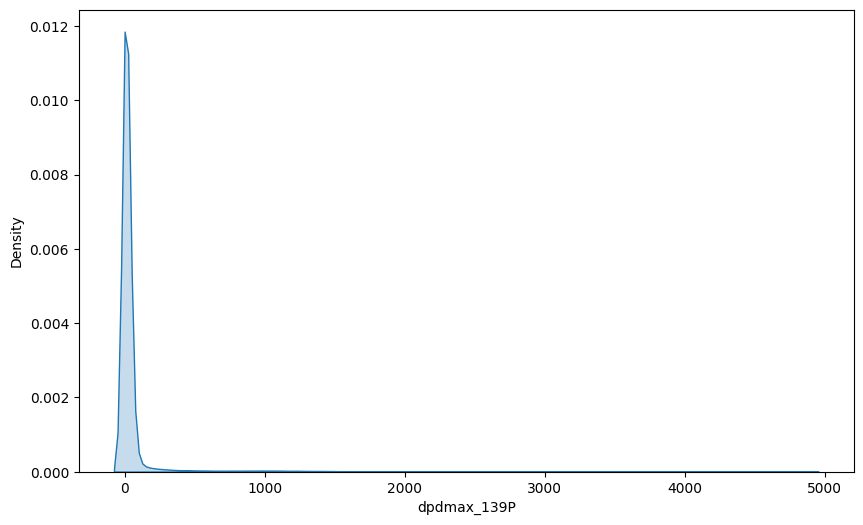

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(x.loc[x>0], shade=True)
plt.show()

## dpdmax_757P
- Maximum days past due for a closed contract.
- closed 신용 계약의 최대 연체 기간
- 과거의 신용 상태를 반영 -> 대출 불이행 가능성을 평가

> **필요논의**
- 음수값 존재(81개) -> 연체 X

In [ ]:
x = df_credit_bureau_1_0.dpdmax_757P
print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"(min, max) = {x.min()}, {x.max()}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"(null, 0, >0) = {x.isna().sum(), (x == 0.0).sum(), (x > 0.0).sum()}")
# print(f"평균: {x[x > 0].mean()}")
# print(f"중간값(0이상): {x[x > 0].median()}")
print(f"평균: {x.mean()}")
print(f"중간값: {x.median()}")

컬럼명: dpdmax_757P
데이터 타입: float64
(min, max) = -9.0, 117000.0
NA 값: True, 0.8928261248
(null, 0, >0) = (3667919, 312253, 127959)
평균: 44.05819306688955
중간값: 0.0


In [ ]:
x[x < 0.0]

62441     -1.0
318083    -2.0
321583    -3.0
520163    -1.0
522287    -2.0
          ... 
4036516   -1.0
4080946   -1.0
4081884   -3.0
4093774   -1.0
4101728   -2.0
Name: dpdmax_757P, Length: 81, dtype: float64

## dpdmaxdatemonth_442T
- Max DPD occurrence month for terminated contracts from credit bureau data.
- 신용 평가 기관 데이터에서 종료된 계약에서 최대 연체가 발생한 월

- **DPD (Days Past Due)**: 대출 상환 기간 내에 지불 기한을 넘긴 일수를 나타내는 지표

> **필요논의**
- month > float 으로 그대로 표기 or object로 변환(categorical value)
- 굳이 float으로 표기할 필요가 있을까,,? 다른 수학적인 계산 필요없을 것 같은데 categorical로 변환? 그럼 encoding은 어떻게? one-hot? x

In [ ]:
x = df_credit_bureau_1_0.dpdmaxdatemonth_442T

print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"(min, max) = {x.min()}, {x.max()}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"(null, 0, >0) = {x.isna().sum(), (x == 0.0).sum(), (x > 0.0).sum()}")
#print(f"평균: {x.mean()}")
#print(f"중간값: {x.median()}")
print(f"----- Value_count ------ \n{x.value_counts()}")

컬럼명: dpdmaxdatemonth_442T
데이터 타입: float64
(min, max) = 1.0, 12.0
NA 값: True, 0.8928261248
(null, 0, >0) = (3667919, 0, 440293)
평균: 6.49804789083633
중간값: 7.0
----- Value_count ------ 
8.0     40851
1.0     40488
6.0     38947
7.0     38561
11.0    38120
9.0     36206
10.0    35753
3.0     34987
2.0     34826
5.0     34663
12.0    33993
4.0     32898
Name: dpdmaxdatemonth_442T, dtype: int64


## dpdmaxdatemonth_89T
- Month when maximum days past due occurred on the active contract with the credit bureau.
- 신용 평가 기관 데이터에서 active 신용 계약에서 최대 연체가 발생한 월

> **필요논의**
- float or categorical value

In [ ]:
x = df_credit_bureau_1_0.dpdmaxdatemonth_89T

print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"(min, max) = {x.min()}, {x.max()}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"(null, 0, >0) = {x.isna().sum(), (x == 0.0).sum(), (x > 0.0).sum()}")
#print(f"평균: {x.mean()}")
#print(f"중간값: {x.median()}")
print(f"----- Value_count ------ \n{x.value_counts()}")

컬럼명: dpdmaxdatemonth_89T
데이터 타입: float64
(min, max) = 1.0, 12.0
NA 값: True, 0.8404198712
(null, 0, >0) = (3452623, 0, 655589)
----- Value_count ------ 
6.0     63929
1.0     61572
5.0     60904
7.0     60089
4.0     57285
2.0     55733
3.0     55446
8.0     51443
10.0    50952
12.0    50012
11.0    46905
9.0     41319
Name: dpdmaxdatemonth_89T, dtype: int64


## dpdmaxdateyear_596T
- Year when maximum Days Past Due (DPD) occurred for the active contract.
- active 신용 계약에서 최대 연체가 발생한 연도

> **필요논의**
- 특정 연도에 대한 논의 필요! > 해당 연도에 어떤 경제적인 사건이 있었는지?

In [ ]:
x = df_credit_bureau_1_0.dpdmaxdateyear_596T
print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"(min, max) = {x.min()}, {x.max()}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"(null, 0, >0) = {x.isna().sum(), (x == 0.0).sum(), (x > 0.0).sum()}")
#print(f"평균: {x.mean()}")
#print(f"중간값: {x.median()}")
print(f"----- Value_count ------ \n{x.value_counts()}")

컬럼명: dpdmaxdateyear_596T
데이터 타입: float64
(min, max) = 2015.0, 2019.0
NA 값: True, 0.8404198712
(null, 0, >0) = (3452623, 0, 655589)
----- Value_count ------ 
2018.0    297600
2017.0    182548
2019.0    175361
2016.0        64
2015.0        16
Name: dpdmaxdateyear_596T, dtype: int64


## dpdmaxdateyear_896T
- Year of maximum Days Past Due of closed contract obtained from Credit Bureau.
- 신용 평가 기관 데이터에서 closed 신용 계약에서 최대 연체가 발생한 연도



In [ ]:
x = df_credit_bureau_1_0.dpdmaxdateyear_896T
print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"(min, max) = {x.min()}, {x.max()}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"(null, 0, >0) = {x.isna().sum(), (x == 0.0).sum(), (x > 0.0).sum()}")
#print(f"평균: {x.mean()}")
#print(f"중간값: {x.median()}")
print(f"----- Value_count ------ \n{x.value_counts()}")

컬럼명: dpdmaxdateyear_896T
데이터 타입: float64
(min, max) = 2003.0, 2019.0
NA 값: True, 0.8928261248
(null, 0, >0) = (3667919, 0, 440293)
----- Value_count ------ 
2018.0    74615
2017.0    62742
2016.0    44484
2015.0    39753
2014.0    35178
2013.0    30525
2012.0    25667
2011.0    23221
2007.0    23134
2019.0    17641
2010.0    17251
2008.0    15959
2009.0    14962
2006.0    11789
2005.0     3224
2004.0      147
2003.0        1
Name: dpdmaxdateyear_896T, dtype: int64


## totalamount_996A
- Total amount of active contracts in the credit bureau.
- 신용기관과 관련하여 active 계약의 총 금액

In [ ]:
x = df_credit_bureau_1_0.totalamount_996A
print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"(min, max) = {x.min()}, {x.max()}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"(null, 0, >0) = {x.isna().sum(), (x == 0.0).sum(), (x > 0.0).sum()}")
# print(f"평균: {x[x > 0].mean()}")
# print(f"중간값(0이상): {x[x > 0].median()}")
print(f"평균: {x.mean()}")
print(f"중간값: {x.median()}")

컬럼명: totalamount_996A
데이터 타입: float64
(min, max) = 5.0, 1391240100.0
NA 값: True, 0.9122869024
(null, 0, >0) = (3747868, 0, 360344)
평균: 205977.31620524003
중간값: 61076.0


## totalamount_6A
- Total amount of closed contracts.
- 종료된 계약의 총 대출액

In [ ]:
x = df_credit_bureau_1_0.totalamount_6A
print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"(min, max) = {x.min()}, {x.max()}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"(null, 0, >0) = {x.isna().sum(), (x == 0.0).sum(), (x > 0.0).sum()}")
# print(f"평균: {x[x > 0].mean()}")
# print(f"중간값(0이상): {x[x > 0].median()}")
print(f"평균: {x.mean()}")
print(f"중간값: {x.median()}")

컬럼명: totalamount_6A
데이터 타입: float64
(min, max) = 0.0, 159574000.0
NA 값: True, 0.9043888193
(null, 0, >0) = (3715421, 658, 392133)
평균: 79191.42813471069
중간값: 27547.201


## totaldebtoverduevalue_178A
- Total amount of past due debt on active contracts.
- active 계약에 대한 연체된 총 부채 금액

In [ ]:
x = df_credit_bureau_1_0.totaldebtoverduevalue_178A
print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"(min, max) = {x.min()}, {x.max()}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"(null, 0, >0) = {x.isna().sum(), (x == 0.0).sum(), (x > 0.0).sum()}")
# print(f"평균: {x[x > 0].mean()}")
# print(f"중간값(0이상): {x[x > 0].median()}")
print(f"평균: {x.mean()}")
print(f"중간값: {x.median()}")

컬럼명: totaldebtoverduevalue_178A
데이터 타입: float64
(min, max) = 0.0, 49005736.0
NA 값: True, 0.9178294596
(null, 0, >0) = (3770638, 320411, 17163)
평균: 1807.5122580590125
중간값: 0.0


## totaldebtoverduevalue_718A
- Total overdue debt amount for closed credit contracts.
- 종료된 계약에 대한 연체된 총 부채 금액

In [ ]:
x = df_credit_bureau_1_0.totaldebtoverduevalue_718A
print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"(min, max) = {x.min()}, {x.max()}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"(null, 0, >0) = {x.isna().sum(), (x == 0.0).sum(), (x > 0.0).sum()}")
# print(f"평균: {x[x > 0].mean()}")
# print(f"중간값(0이상): {x[x > 0].median()}")
print(f"평균: {x.mean()}")
print(f"중간값: {x.median()}")

컬럼명: totaldebtoverduevalue_718A
데이터 타입: float64
(min, max) = 0.0, 433225.0
NA 값: True, 0.9273158250
(null, 0, >0) = (3809610, 298208, 394)
평균: 104.79311905289185
중간값: 0.0


## totaloutstanddebtvalue_39A
- Total outstanding debt for active contracts in the credit bureau.
- 신용기관에 기록된 active 계약에 대한 미지급된 총 부채 금액

In [ ]:
x = df_credit_bureau_1_0.totaloutstanddebtvalue_39A
print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"(min, max) = {x.min()}, {x.max()}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"(null, 0, >0) = {x.isna().sum(), (x == 0.0).sum(), (x > 0.0).sum()}")
# print(f"평균: {x[x > 0].mean()}")
# print(f"중간값(0이상): {x[x > 0].median()}")
print(f"평균: {x.mean()}")
print(f"중간값: {x.median()}")

컬럼명: totaloutstanddebtvalue_39A
데이터 타입: float64
(min, max) = 0.0, 1688617600.0
NA 값: True, 0.9178294596
(null, 0, >0) = (3770638, 39062, 298512)
평균: 196536.96902275702
중간값: 57493.941999999995


## totaloutstanddebtvalue_668A
- Total outstanding debt for the closed contracts in the credit bureau.
- 신용기관에 기록된 closed 계약에 대한 미지급된 총 부채 금액

In [ ]:
x = df_credit_bureau_1_0.totaloutstanddebtvalue_668A
print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"(min, max) = {x.min()}, {x.max()}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"(null, 0, >0) = {x.isna().sum(), (x == 0.0).sum(), (x > 0.0).sum()}")
# print(f"평균: {x[x > 0].mean()}")
# print(f"중간값(0이상): {x[x > 0].median()}")
print(f"평균: {x.mean()}")
print(f"중간값: {x.median()}")

컬럼명: totaloutstanddebtvalue_668A
데이터 타입: float64
(min, max) = 0.0, 16952312.0
NA 값: True, 0.9273158250
(null, 0, >0) = (3809610, 298175, 427)
평균: 107.90455299037211
중간값: 0.0


## -------- 거래금융기관, Credit Bureau에 기록된 정보 --------

## refreshdate_3813885D
- Date when the credit bureau's public sources have been last updated.
- 신용 기관의 공개 소스가 마지막으로 업데이트된 날짜

In [ ]:
x = df_credit_bureau_1_0.refreshdate_3813885D
x_dt = pd.to_datetime(x)
print(f"데이터 타입은? {x_dt.dtype}")
print(f"(min, max) = {x_dt.min().date()}, {x_dt.max().date()}")
print(f"NA 값이 있나요? {any(x.isna())}, {x.isna().sum()/len(x) * 100}")
print(f"dayofweek 종류: \n{x_dt.dt.dayofweek.value_counts().sort_values(ascending=False)}")

데이터 타입은? datetime64[ns]
(min, max) = 2018-11-02, 2019-07-08
NA 값이 있나요? True, 34.8073078993976
dayofweek 종류: 
2.0    591639
3.0    505679
0.0    377515
6.0    377269
4.0    319479
5.0    284081
1.0    222592
Name: refreshdate_3813885D, dtype: int64


## financialinstitution_382M
- Name of financial institution that is linked to a closed contract.
- Closed 계약과 연결된 금융 기관 이름
- Masking Category

> **필요논의**

- 각 금융기관별로 분석해볼 수 있음
- `Home Credit` 항목?
- 다른 항목과 달라보이는 이름의 존재(`P133_127_114 P150_136_157`


In [ ]:
x = df_credit_bureau_1_0.financialinstitution_382M
print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"Categories: {len(x.unique())},{ x.unique()}")
print("--- Value Counts ---")
x.value_counts()

컬럼명: financialinstitution_382M
데이터 타입: object
NA 값: False, 0.0000000000
Categories: 211,['a55475b1' 'b619fa46' 'P40_52_135' 'P133_127_114' '9a93e20f' 'P20_84_65'
 '9325d851' 'P204_66_73' 'P150_136_157' 'P51_123_23' '16e9971f' '1f5ab063'
 '51684633' 'd6a7d943' 'P193_154_60' 'Home Credit' '84d62c22' '8fc70d27'
 '50babcd4' 'a4f0ab55' 'd4e7a843' '952e9882' 'P8_56_129' '7e4feb1b'
 '67c9a35b' '0d39f5db' 'P102_97_118' '6cfcdd0c' 'd35b8336' 'a0fa072e'
 'f4b22787' '528d7cef' 'b0c676ae' 'dcb42d2c' '435e3f52' 'cc8de998'
 '0a20fa9e' 'c1525162' '79598c5d' 'P40_25_35' '58e10f35' 'cc2c2610'
 '55b002a9' '5dd97ba4' '01595096' '8da66b4b' '92ed9984' '7df02535'
 '6ac884b8' '3629ef14' 'e9bfdb5c' '8997b931' '358c9fe2' 'd3279774'
 'a9d35603' '5566a43a' 'acc27a10' 'fd828f59' 'dcf5a604' '6d9af8c5'
 'a97f66ac' 'a24a91cd' '8be4e516' 'P190_77_138' '41bb1335' '3783337d'
 'cb830fec' '56fc0e7c' '230bbe1d' '6d53485a' '56b2d0da' 'b2145224'
 '05ccb162' 'db36d360' '7df45473' 'f0a813a9' 'a365816f' '461a69bc'
 '5f6f27be' 

a55475b1        3651491
Home Credit      142353
P133_127_114      50358
P150_136_157      42631
b619fa46          36699
                 ...   
f43b5c1d              1
a69c8898              1
a7b6e9df              1
eb77f8bf              1
5467828d              1
Name: financialinstitution_382M, Length: 211, dtype: int64

## financialinstitution_591M
- Financial institution name of the active contract.
- active하게 진행중인 대출이나 신용 계약과 연결된 금융 기관의 이름


In [ ]:
x = df_credit_bureau_1_0.financialinstitution_591M
print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"Categories: {len(x.unique())},{ x.unique()}")
print("--- Value Counts ---")
x.value_counts()

컬럼명: financialinstitution_591M
데이터 타입: object
NA 값: False, 0.0000000000
Categories: 137,['55b002a9' 'P204_66_73' 'a55475b1' 'P150_136_157' 'P133_127_114'
 '50babcd4' 'd6a7d943' '84d62c22' 'd35b8336' 'P51_123_23' 'f4518152'
 '8fc70d27' 'P102_97_118' 'dcf5a604' '05ccb162' '9a93e20f' '2d02cbc6'
 '230bbe1d' 'a24a91cd' '7e4feb1b' '1f5ab063' 'Home Credit' '7df02535'
 '8997b931' '0d39f5db' '56fc0e7c' '92ed9984' '57573fe3' 'P193_154_60'
 '71de340a' 'a0fa072e' 'fd828f59' 'c1525162' '11f1298d' 'a0904c48'
 '358c9fe2' '3b0f9cfa' 'a97f66ac' 'f27ed340' '16e9971f' '51684633'
 'e9bfdb5c' '8f705762' '47f9fc8a' '98bdccc4' 'f4b22787' 'a365816f'
 'd3279774' '6da01529' 'a5145fc8' '3783337d' '2b72f3fa' 'bbef8ee7'
 'acc27a10' '6a62c41c' '28dfc080' '56b2d0da' 'f0606fbf' '4622abb2'
 'e2a39b1a' 'c278975a' 'a56a8ba1' 'dbddb6bb' '759fdd2c' 'dcd48f0a'
 '44e50dcc' 'f0a813a9' '090eb0c2' '0a20fa9e' '360a478c' '889c1f9d'
 '31a44ce0' '37599a5c' '09df6179' '6cfa633d' '5467828d' 'e7b2248f'
 '73c01aa2' 'b60714db' '7acab29

a55475b1        3449815
P204_66_73       254397
Home Credit      172605
P133_127_114      62452
P150_136_157      59528
                 ...   
ee913009              1
2a0f05ab              1
d4e7a843              1
e9bcbab2              1
3c0e22c9              1
Name: financialinstitution_591M, Length: 137, dtype: int64


## instlamount_768A
- Instalment amount for the active contract in credit bureau.
-  신용 기관에 기록된 active 신용 계약의 분납금(분할금)
- 일정한 기간 동안 대출을 상환하는 데 필요한 매월 또는 주기적으로 지불해야 하는 금액
- 원금과 이자를 모두 포함하여 계산

In [ ]:
x = df_credit_bureau_1_0.instlamount_768A
print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"(min, max) = {x.min()}, {x.max()}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"(null, 0, >0) = {x.isna().sum(), (x == 0.0).sum(), (x > 0.0).sum()}")
# print(f"평균: {x[x > 0].mean()}")
# print(f"중간값(0이상): {x[x > 0].median()}")
print(f"평균: {x.mean()}")
print(f"중간값: {x.median()}")

컬럼명: instlamount_768A
데이터 타입: float64
(min, max) = 0.0, 376510.5
NA 값: True, 0.9281587708
(null, 0, >0) = (3813073, 117602, 177537)
평균: 3259.7673505801467
중간값: 1131.0


## instlamount_852A
- Instalment amount for closed contract.
- closed 계약의 분납금(분할금)


In [ ]:
x = df_credit_bureau_1_0.instlamount_852A
print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"(min, max) = {x.min()}, {x.max()}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"(null, 0, >0) = {x.isna().sum(), (x == 0.0).sum(), (x > 0.0).sum()}")
# print(f"평균: {x[x > 0].mean()}")
# print(f"중간값(0이상): {x[x > 0].median()}")
print(f"평균: {x.mean()}")
print(f"중간값: {x.median()}")

컬럼명: instlamount_852A
데이터 타입: float64
(min, max) = 0.0, 139346.98
NA 값: True, 0.9900063580
(null, 0, >0) = (4067156, 26836, 14220)
평균: 575.6078158871306
중간값: 0.0


## monthlyinstlamount_332A
- Monthly instalment amount for active contract.
- active 계약의 매월 분납금

>**해석**
- `instlamount_768A`과의 차이는 x > monthlyinstlamount 부분적으로 포함

In [ ]:
x = df_credit_bureau_1_0.monthlyinstlamount_332A
print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"(min, max) = {x.min()}, {x.max()}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"(null, 0, >0) = {x.isna().sum(), (x == 0.0).sum(), (x > 0.0).sum()}")
# print(f"평균: {x[x > 0].mean()}")
# print(f"중간값(0이상): {x[x > 0].median()}")
print(f"평균: {x.mean()}")
print(f"중간값: {x.median()}")

컬럼명: monthlyinstlamount_332A
데이터 타입: float64
(min, max) = 0.0, 20000000.0
NA 값: True, 0.8404928957
(null, 0, >0) = (3452923, 118642, 536647)
평균: 5226.822745331264
중간값: 3167.2


## monthlyinstlamount_674A
- Monthly amount of instalment payment on a closed contract.
- closed 계약의 매월 분납금

In [ ]:
x = df_credit_bureau_1_0.monthlyinstlamount_674A
print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"(min, max) = {x.min()}, {x.max()}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"(null, 0, >0) = {x.isna().sum(), (x == 0.0).sum(), (x > 0.0).sum()}")
# print(f"평균: {x[x > 0].mean()}")
# print(f"중간값(0이상): {x[x > 0].median()}")
print(f"평균: {x.mean()}")
print(f"중간값: {x.median()}")

컬럼명: monthlyinstlamount_674A
데이터 타입: float64
(min, max) = 0.0, 59077588.0
NA 값: True, 0.8975522685
(null, 0, >0) = (3687335, 219375, 201502)
평균: 5896.002702272428
중간값: 0.0


In [ ]:
x1 = df_credit_bureau_1_0.instlamount_768A
x2 = df_credit_bureau_1_0.monthlyinstlamount_332A

print(df_credit_bureau_1_0[['instlamount_768A', 'monthlyinstlamount_332A']][x1 == 1131.0 ])
print("------------")
print(df_credit_bureau_1_0[['instlamount_768A', 'monthlyinstlamount_332A']][x1 == 376510.5 ])
print("------------")
print(df_credit_bureau_1_0[['instlamount_768A', 'monthlyinstlamount_332A']][x2 == 20000000.0])
print("------------")
print(df_credit_bureau_1_0[['instlamount_768A', 'monthlyinstlamount_332A']][x2 > 376510.5 ])


         instlamount_768A  monthlyinstlamount_332A
491537             1131.0                   1131.0
618379             1131.0                   1131.0
1041594            1131.0                   1131.0
1923625            1131.0                   1131.0
2353247            1131.0                   1131.0
2461592            1131.0                   1131.0
3012021            1131.0                   1131.0
3086145            1131.0                   1131.0
3211700            1131.0                   1131.0
3255410            1131.0                   1131.0
------------
         instlamount_768A  monthlyinstlamount_332A
2148186          376510.5                 376510.5
------------
        instlamount_768A  monthlyinstlamount_332A
602634               NaN               20000000.0
------------
         instlamount_768A  monthlyinstlamount_332A
6230                  NaN                438404.84
122565                NaN                840000.00
122567                NaN                4200

In [ ]:
print(df_credit_bureau_1_0[['instlamount_768A', 'monthlyinstlamount_332A']][(x1 != x2) & x2])
print(df_credit_bureau_1_0[['instlamount_768A', 'monthlyinstlamount_332A']][(x1 != x2) & x1])

         instlamount_768A  monthlyinstlamount_332A
0                     NaN                7811.4463
12                    NaN                6972.1885
22                    NaN                5767.6220
23                    NaN                2238.0000
24                    NaN                1487.4000
...                   ...                      ...
4108112               NaN                1814.6000
4108134               NaN                4585.6000
4108145               NaN                3102.3699
4108190               NaN                2799.8000
4108202               NaN                2451.0000

[359110 rows x 2 columns]
Empty DataFrame
Columns: [instlamount_768A, monthlyinstlamount_332A]
Index: []


## interestrate_508L
- Interest rate for a closed contract in the credit bureau.
- 신용 기관에 기록된 closed 계약의 이자율

In [ ]:
x = df_credit_bureau_1_0.interestrate_508L
print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"(min, max) = {x.min()}, {x.max()}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"(null, 0, >0) = {x.isna().sum(), (x == 0.0).sum(), (x > 0.0).sum()}")
# print(f"평균: {x[x > 0].mean()}")
# print(f"중간값(0이상): {x[x > 0].median()}")
print(f"평균: {x.mean()}")
print(f"중간값: {x.median()}")

컬럼명: interestrate_508L
데이터 타입: float64
(min, max) = 0.0, 32917.0
NA 값: True, 0.9987252362
(null, 0, >0) = (4102975, 55, 5182)
평균: 66.49442428871492
중간값: 20.0


## numberofcontrsvalue_258L
- Number of active contracts in credit bureau.
- 신용 기관에 기록된 active 계약수

>**해석**
- 평균 < 중앙값 --> left skewed? --> 큰 차이도 없을 뿐더러, float dtype이라서..?

In [ ]:
x = df_credit_bureau_1_0.numberofcontrsvalue_258L
x_int = x.dropna().astype(int)
print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"(min, max) = {x.min()}, {x.max()}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"(null, 0, >0) = {x.isna().sum(), (x == 0.0).sum(), (x > 0.0).sum()}")
# print(f"평균: {x[x > 0].mean()}")
# print(f"중간값(0이상): {x[x > 0].median()}")
print(f"평균: {x.mean()}, {x_int.mean()}")
print(f"중간값: {x.median()}, {x_int.median()}")

컬럼명: numberofcontrsvalue_258L
데이터 타입: float64
(min, max) = 0.0, 46.0
NA 값: True, 0.9178294596
(null, 0, >0) = (3770638, 804, 336770)
평균: 1.9417401814120756, 1.9417401814120756
중간값: 2.0, 2.0


KeyboardInterrupt: 

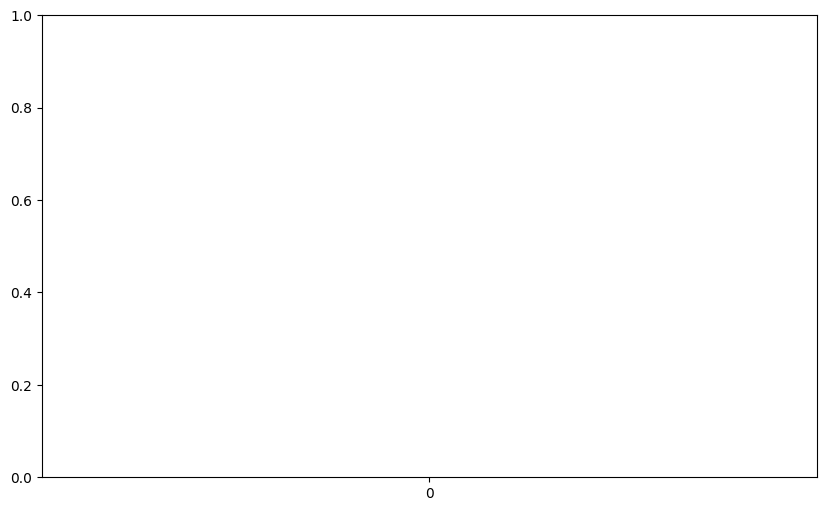

In [ ]:
plt.figure(figsize=(10, 6))
#sns.kdeplot(np.log(x))
sns.barplot(x_int, color='red') # timeout
plt.show()

## numberofcontrsvalue_358L
- Number of closed credit contracts.
- closed 계약 수

In [ ]:
x = df_credit_bureau_1_0.numberofcontrsvalue_358L
print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"(min, max) = {x.min()}, {x.max()}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"(null, 0, >0) = {x.isna().sum(), (x == 0.0).sum(), (x > 0.0).sum()}")
# print(f"평균: {x[x > 0].mean()}")
# print(f"중간값(0이상): {x[x > 0].median()}")
print(f"평균: {x.mean()}")
print(f"중간값: {x.median()}")

컬럼명: numberofcontrsvalue_358L
데이터 타입: float64
(min, max) = 0.0, 280.0
NA 값: True, 0.9273158250
(null, 0, >0) = (3809610, 24, 298578)
평균: 5.973958647296401
중간값: 4.0


## numberofinstls_320L
- Number of instalments of the active contract.
- active 계약의 분할 납부 횟수

In [ ]:
x = df_credit_bureau_1_0.numberofinstls_320L
print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"(min, max) = {x.min()}, {x.max()}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"(null, 0, >0) = {x.isna().sum(), (x == 0.0).sum(), (x > 0.0).sum()}")
# print(f"평균: {x[x > 0].mean()}")
# print(f"중간값(0이상): {x[x > 0].median()}")
print(f"평균: {x.mean()}")
print(f"중간값: {x.median()}")

컬럼명: numberofinstls_320L
데이터 타입: float64
(min, max) = 0.0, 479.0
NA 값: True, 0.9123129478
(null, 0, >0) = (3747975, 119, 360118)
평균: 30.627409177846808
중간값: 24.0


## numberofinstls_229L
- Number of instalments on closed contract.
- closed 계약의 분납(분할)금 수
- 해당 고객이 가지고 있던 closed 된 계약에서 지불해야 했던 분할 납부 수

In [ ]:
x = df_credit_bureau_1_0.numberofinstls_229L
print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"(min, max) = {x.min()}, {x.max()}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"(null, 0, >0) = {x.isna().sum(), (x == 0.0).sum(), (x > 0.0).sum()}")
# print(f"평균: {x[x > 0].mean()}")
# print(f"중간값(0이상): {x[x > 0].median()}")
print(f"평균: {x.mean()}")
print(f"중간값: {x.median()}")

컬럼명: numberofinstls_229L
데이터 타입: float64
(min, max) = 0.0, 600.0
NA 값: True, 0.9045234277
(null, 0, >0) = (3715974, 88926, 303312)
평균: 12.57407747337076
중간값: 6.0


## numberofoutstandinstls_59L
- Number of outstanding instalments for `the` active contracts.
- 한 active 계약의 미납 할부 수
- 현재 진행 중인 계약에서 아직 지불하지 않은 할부 수

> **필요논의**
- numberofoverdueinstlmax_1039L와 the 차이 -> 각 계약의 할부 횟수를 뜻하는것일까? max 최대를 뜻?
  - --> Maximum number of past due installments for a active contract.은 `numberofoverdueinstls_725L` 컬럼에서 설명
- 해당 컬럼의 범위가 좀 더 작음


In [ ]:
x = df_credit_bureau_1_0.numberofoutstandinstls_59L
print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"(min, max) = {x.min()}, {x.max()}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"(null, 0, >0) = {x.isna().sum(), (x == 0.0).sum(), (x > 0.0).sum()}")
# print(f"평균: {x[x > 0].mean()}")
# print(f"중간값(0이상): {x[x > 0].median()}")
print(f"평균: {x.mean()}")
print(f"중간값: {x.median()}")

컬럼명: numberofoutstandinstls_59L
데이터 타입: float64
(min, max) = 0.0, 318.0
NA 값: True, 0.9123173293
(null, 0, >0) = (3747993, 3116, 357103)
평균: 20.66127827793648
중간값: 12.0


## numberofoverdueinstlmax_1039L
- Number of outstanding instalments for active contracts.
  --> Maximum number of past due installments for a active contract.(?): `numberofoverdueinstls_725L` 해당 컬럼에서 설명
- 해당 고객의 active contracts에서의 미납 할부 횟수

In [ ]:
x = df_credit_bureau_1_0.numberofoverdueinstlmax_1039L
print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"(min, max) = {x.min()}, {x.max()}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"(null, 0, >0) = {x.isna().sum(), (x == 0.0).sum(), (x > 0.0).sum()}")
# print(f"평균: {x[x > 0].mean()}")
# print(f"중간값(0이상): {x[x > 0].median()}")
print(f"평균: {x.mean()}")
print(f"중간값: {x.median()}")

컬럼명: numberofoverdueinstlmax_1039L
데이터 타입: float64
(min, max) = 0.0, 61133.0
NA 값: True, 0.8397363622
(null, 0, >0) = (3449815, 490438, 167959)
평균: 16.546135538284652
중간값: 0.0


## numberofoutstandinstls_520L
- Number of outstanding instalment for closed contract.
- closed 계약의 미납 할부금 수

In [ ]:
x = df_credit_bureau_1_0.numberofoutstandinstls_520L
print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"(min, max) = {x.min()}, {x.max()}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"(null, 0, >0) = {x.isna().sum(), (x == 0.0).sum(), (x > 0.0).sum()}")
# print(f"평균: {x[x > 0].mean()}")
# print(f"중간값(0이상): {x[x > 0].median()}")
print(f"평균: {x.mean()}")
print(f"중간값: {x.median()}")

컬럼명: numberofoutstandinstls_520L
데이터 타입: float64
(min, max) = 0.0, 525.0
NA 값: True, 0.9044477257
(null, 0, >0) = (3715663, 391852, 697)
평균: 0.08181399010059891
중간값: 0.0


## numberofoverdueinstlmax_1151L
- Maximum number of past due installments for a closed contract.
- closed 계약의 최대 연체 할부금 수

>**해석**
- 높은 값은 고객의 대출 불이행 위험도 가능성 높아짐

In [ ]:
x = df_credit_bureau_1_0.numberofoverdueinstlmax_1151L
print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"(min, max) = {x.min()}, {x.max()}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"(null, 0, >0) = {x.isna().sum(), (x == 0.0).sum(), (x > 0.0).sum()}")
# print(f"평균: {x[x > 0].mean()}")
# print(f"중간값(0이상): {x[x > 0].median()}")
print(f"평균: {x.mean()}")
print(f"중간값: {x.median()}")

컬럼명: numberofoverdueinstlmax_1151L
데이터 타입: float64
(min, max) = 0.0, 260000.0
NA 값: True, 0.8888273049
(null, 0, >0) = (3651491, 319803, 136918)
평균: 51.78596780091128
중간값: 0.0


## numberofoverdueinstls_725L
- Maximum number of past due instalments for an active contract.
- active 계약의 최대 연체 할부금 수

In [ ]:
x = df_credit_bureau_1_0.numberofoverdueinstls_725L
print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"(min, max) = {x.min()}, {x.max()}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"(null, 0, >0) = {x.isna().sum(), (x == 0.0).sum(), (x > 0.0).sum()}")
# print(f"평균: {x[x > 0].mean()}")
# print(f"중간값(0이상): {x[x > 0].median()}")
print(f"평균: {x.mean()}")
print(f"중간값: {x.median()}")

컬럼명: numberofoverdueinstls_725L
데이터 타입: float64
(min, max) = 0.0, 5419.0
NA 값: True, 0.8404347195
(null, 0, >0) = (3452684, 636359, 19169)
평균: 8.684010446540803
중간값: 0.0


## numberofoverdueinstls_834L
- Number of past due instalments for a closed contract.
- closed 계약의 연체 할부금 수



In [ ]:
x = df_credit_bureau_1_0.numberofoverdueinstls_834L
print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"(min, max) = {x.min()}, {x.max()}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"(null, 0, >0) = {x.isna().sum(), (x == 0.0).sum(), (x > 0.0).sum()}")
# print(f"평균: {x[x > 0].mean()}")
# print(f"중간값(0이상): {x[x > 0].median()}")
print(f"평균: {x.mean()}")
print(f"중간값: {x.median()}")

컬럼명: numberofoverdueinstls_834L
데이터 타입: float64
(min, max) = 0.0, 868.0
NA 값: True, 0.8889546109
(null, 0, >0) = (3652014, 455861, 337)
평균: 0.05372886334442501
중간값: 0.0


## periodicityofpmts_837L
- Frequency of instalments for an active contract.
- active 계약의 할부 지불 빈도

>**해석**
- 단위가 1일, 30일(1달), 90일(2달), 180일(3달), 360(1년) 기준

In [ ]:
x = df_credit_bureau_1_0.periodicityofpmts_837L
print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"(min, max) = {x.min()}, {x.max()}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"(null, 0, >0) = {x.isna().sum(), (x == 0.0).sum(), (x > 0.0).sum()}")
# print(f"평균: {x[x > 0].mean()}")
# print(f"중간값(0이상): {x[x > 0].median()}")
print(f"평균: {x.mean()}")
print(f"중간값: {x.median()}")
print(f"----- Value_count ------ \n{x.value_counts()}")

컬럼명: periodicityofpmts_837L
데이터 타입: float64
(min, max) = 1.0, 360.0
NA 값: True, 0.9141329610
(null, 0, >0) = (3755452, 0, 352760)
평균: 30.31703991382243
중간값: 30.0
----- Value_count ------ 
30.0     351861
180.0       633
90.0        224
1.0          29
360.0        13
Name: periodicityofpmts_837L, dtype: int64


## periodicityofpmts_1102L
 - Frequency of instalments for a closed contract.
 - closed 계약의 할부 지불 빈도

>**해석**
- 단위가 1일, 30일(1달), 90일(2달), 180일(3달), 360(1년) 기준

In [ ]:
x = df_credit_bureau_1_0.periodicityofpmts_1102L
print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"(min, max) = {x.min()}, {x.max()}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"(null, 0, >0) = {x.isna().sum(), (x == 0.0).sum(), (x > 0.0).sum()}")
# print(f"평균: {x[x > 0].mean()}")
# print(f"중간값(0이상): {x[x > 0].median()}")
print(f"평균: {x.mean()}")
print(f"중간값: {x.median()}")
print(f"----- Value_count ------ \n{x.value_counts()}")

컬럼명: periodicityofpmts_1102L
데이터 타입: float64
(min, max) = 1.0, 360.0
NA 값: True, 0.9124519377
(null, 0, >0) = (3748546, 0, 359666)
평균: 30.11575461678335
중간값: 30.0
----- Value_count ------ 
30.0     359153
1.0         233
180.0       180
360.0        57
90.0         43
Name: periodicityofpmts_1102L, dtype: int64


## purposeofcred_426M
- Purpose of credit for active contract.
- active 계약의 대출 목적

In [ ]:
x = df_credit_bureau_1_0.purposeofcred_426M
print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"Categories: {len(x.unique())},{ x.unique()}")
print("--- Value Counts ---")
x.value_counts()

컬럼명: purposeofcred_426M
데이터 타입: object
NA 값: False, 0.0000000000
Categories: 12,['96a8fdfe' '60c73645' 'a55475b1' 'e19fdece' '7a7d6960' '9e302002'
 'P188_162_121' '28bfa260' 'e8f3b178' '44164129' '5065c2b8' '8193a6ce']
--- Value Counts ---


a55475b1        3449815
60c73645         504371
96a8fdfe         147626
e19fdece           3478
9e302002           1668
7a7d6960            642
44164129            266
e8f3b178            116
28bfa260            102
8193a6ce             62
P188_162_121         60
5065c2b8              6
Name: purposeofcred_426M, dtype: int64

## purposeofcred_874M
- Purpose of credit on a closed contract.
- closed 계약의 대출 목적

In [ ]:
x = df_credit_bureau_1_0.purposeofcred_874M
print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"Categories: {len(x.unique())},{ x.unique()}")
print("--- Value Counts ---")
x.value_counts()

컬럼명: purposeofcred_874M
데이터 타입: object
NA 값: False, 0.0000000000
Categories: 18,['a55475b1' '5065c2b8' 'e19fdece' '96a8fdfe' '60c73645' 'd9ae1a0e'
 '27b6de28' '89ccf2a3' 'ee7d1eb8' '5d1b0cdd' 'd11871e7' '7a7d6960'
 'P188_162_121' 'e8f3b178' '7ff464db' '44164129' '8193a6ce' '28bfa260']
--- Value Counts ---


a55475b1        3651541
60c73645         208624
5065c2b8         125894
96a8fdfe         101951
e19fdece           8652
d9ae1a0e           5635
27b6de28           2021
5d1b0cdd           1088
d11871e7            736
89ccf2a3            665
7a7d6960            322
P188_162_121        317
ee7d1eb8            281
44164129            209
7ff464db            129
e8f3b178             96
8193a6ce             31
28bfa260             20
Name: purposeofcred_874M, dtype: int64

## prolongationcount_1120L
- Count of prolongations on terminated contract according to credit bureau.
- 신용 기관에 따라 종료된 계약이 몇 번 연장되었는지 나타냄


In [ ]:
x = df_credit_bureau_1_0.prolongationcount_1120L
print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"(min, max) = {x.min()}, {x.max()}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"(null, 0, >0) = {x.isna().sum(), (x == 0.0).sum(), (x > 0.0).sum()}")
# print(f"평균: {x[x > 0].mean()}")
# print(f"중간값(0이상): {x[x > 0].median()}")
print(f"평균: {x.mean()}")
print(f"중간값: {x.median()}")
print(f"----- Value_count ------ \n{x.value_counts()}")

컬럼명: prolongationcount_1120L
데이터 타입: float64
(min, max) = 0.0, 96.0
NA 값: True, 0.9935604589
(null, 0, >0) = (4081757, 20649, 5806)
평균: 0.5801549801549801
중간값: 0.0
----- Value_count ------ 
0.0     20649
1.0      3127
2.0      1124
3.0       538
4.0       293
5.0       202
6.0       118
7.0        84
8.0        61
9.0        40
10.0       39
12.0       26
11.0       23
13.0       16
14.0       14
15.0       13
18.0        7
19.0        7
17.0        7
20.0        6
24.0        6
21.0        6
16.0        5
23.0        5
26.0        4
33.0        3
28.0        3
41.0        3
44.0        3
29.0        2
31.0        2
27.0        2
43.0        2
35.0        2
40.0        1
30.0        1
22.0        1
34.0        1
56.0        1
47.0        1
66.0        1
54.0        1
96.0        1
55.0        1
80.0        1
39.0        1
25.0        1
Name: prolongationcount_1120L, dtype: int64


## prolongationcount_599L
- Count of active contract prolongations.
- active 계약이 연장된 횟수

In [ ]:
x = df_credit_bureau_1_0.prolongationcount_599L
print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"(min, max) = {x.min()}, {x.max()}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"(null, 0, >0) = {x.isna().sum(), (x == 0.0).sum(), (x > 0.0).sum()}")
# print(f"평균: {x[x > 0].mean()}")
# print(f"중간값(0이상): {x[x > 0].median()}")
print(f"평균: {x.mean()}")
print(f"중간값: {x.median()}")
print(f"----- Value_count ------ \n{x.value_counts()}")

컬럼명: prolongationcount_599L
데이터 타입: float64
(min, max) = 0.0, 63.0
NA 값: True, 0.9985414579
(null, 0, >0) = (4102220, 3978, 2014)
평균: 1.0272029372496663
중간값: 0.0
----- Value_count ------ 
0.0     3978
1.0     1042
2.0      350
3.0      207
4.0      124
5.0       64
7.0       37
6.0       35
9.0       25
8.0       21
11.0      17
10.0      15
12.0      13
14.0       8
16.0       6
13.0       6
15.0       5
17.0       3
22.0       3
21.0       3
23.0       3
18.0       3
54.0       2
27.0       2
28.0       2
55.0       2
36.0       2
51.0       2
50.0       2
33.0       1
40.0       1
20.0       1
63.0       1
39.0       1
48.0       1
19.0       1
26.0       1
38.0       1
29.0       1
Name: prolongationcount_599L, dtype: int64


## subjectrole_182M
- Subject role in active credit contract.
- active 계약에서 주체의 역할

> **참고**
- 대출자 (Borrower):대출을 받는 개인 또는 기업
대출금을 받고, 대출 상환 의무를 갖음.

> - 대출 신청자 (Loan Applicant): 대출을 받기 위해 대출을 신청한 개인 또는 기업. 대출 승인을 받은 후에는 대출자가 됨.

>- 대출 제공자 (Lender):대출을 제공하는 금융 기관.
대출을 제공하고, 대출금을 회수하는 권리를 갖습니다.

>- 보증인 (Guarantor):대출 상환을 보증하는 개인 또는 기업
대출자가 상환을 못 할 경우 보증인이 대출금을 대신 상환해야 할 수 있음.

등

In [ ]:
x = df_credit_bureau_1_0.subjectrole_182M
print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"Categories: {len(x.unique())},{ x.unique()}")
print("--- Value Counts ---")
x.value_counts()

컬럼명: subjectrole_182M
데이터 타입: object
NA 값: False, 0.0000000000
Categories: 7,['ab3c25cf' 'a55475b1' 'be4fd70b' 'daf49a8a' 'P28_48_88' '15f04f45'
 '0c42a10e']
--- Value Counts ---


a55475b1     3770638
ab3c25cf      323758
be4fd70b        8394
daf49a8a        4087
P28_48_88       1006
15f04f45         328
0c42a10e           1
Name: subjectrole_182M, dtype: int64

## subjectrole_93M
- Subject role in closed credit contract.

In [ ]:
x = df_credit_bureau_1_0.subjectrole_93M
print(f"컬럼명: {x.name}")
print(f"데이터 타입: {x.dtype}")
print(f"NA 값: {any(x.isna())}, {x.isna().sum() / x.shape[0]:.10f}")
print(f"Categories: {len(x.unique())},{ x.unique()}")
print("--- Value Counts ---")
x.value_counts()

컬럼명: subjectrole_93M
데이터 타입: object
NA 값: False, 0.0000000000
Categories: 7,['ab3c25cf' 'a55475b1' 'daf49a8a' 'be4fd70b' '15f04f45' '0c42a10e'
 '71ddaa88']
--- Value Counts ---


a55475b1    3809610
ab3c25cf     288101
be4fd70b       4601
daf49a8a       4340
15f04f45       1533
71ddaa88         24
0c42a10e          3
Name: subjectrole_93M, dtype: int64